# Airline Passenger Satisfaction Prediction
---
#### **Author**: Michael Holthouser

![Header](images/title_pic.jpeg)

## Business Understanding
---
**Explorer Airlines** has tasked me with conducting a predictive analysis of their passengers' satisfaction levels and identifying key features that have the greatest influence on customer satisfaction. In the past year, Explorer Airlines has observed a decline in customer satisfaction, and the board of executives wants to understand what the company needs to address to halt this downward trend.

During the pandemic, travelers enjoyed some unexpected benefits, such as fewer passengers, emptier flights, and ticket price flexibility. This led to more space on airplanes, reduced waiting times, and increased attention from flight attendants. Now that the pandemic is behind us, travelers are no longer afraid of flying, and flights are once again fully occupied.

While some may view the decrease in satisfaction as a negative development, it can also be seen as an opportunity. Michael Taylor, travel intelligence lead at J.D. Power said it best,  "If airlines can find ways to manage the growing passenger volumes and make small adjustments to help passengers feel more valued, they should be able to overcome this challenge and return to 'normal'. [CNN Travel](https://www.cnn.com/travel/article/jd-power-2022-north-american-airline-satisfaction-survey-results/index.html)



### Evaluation Metric : F1-Score
- F1 score is a harmonic mean of precision and recall, which are both important metrics in classification tasks. Precision measures the proportion of true positive predictions among all positive predictions, while recall measures the proportion of true positive predictions among all actual positives.


- In predicting customer satisfaction for airline passengers, both precision and recall are equally important. A high precision means that the model is making fewer false positive predictions, or in other words, correctly identifying satisfied customers. A high recall means that the model is making fewer false negative predictions, or in other words, correctly identifying dissatisfied customers.


- F1 score balances the tradeoff between precision and recall by taking into account both metrics. A high F1 score means that the model is performing well in both identifying satisfied and dissatisfied customers. Therefore, using F1 score as the evaluation metric ensures that the model is performing well in both identifying satisfied and dissatisfied customers, which is important for predicting customer satisfaction for airline passengers.

## Models
- For this project I used 5 different classification models:
1. **Logistic Regression** - I used logistic regression as my baseline model. After spliting the data into train and test sets, I checked for imbalance. The result was that the data was pretty well balanced. So imbalancing techniques like SMOTE were not necessary. Logistic Regression was my worst performing model, and did not score as high as the other models.
    - Roc auc score = 89%
    - Neutral or Dissatisfied F1-score = 91%
    - Satisfied F1-score = 87%
    - Misclassified  Predictions = 2534
2. **Decision Tree** - I performed two different decision tree models: decision tree with no tuning, and a decision tree using GridSearchCV. Decision trees require a lot of tuning to become accurate, that is why after my first model with no tuning showed signs of overfitting. After performing a gridsearch on my second model, I ran the model again but with more hyperparameters to try to improve accuracy and reduce overfitting. Compared to the logistic regression model, the decision tree with gridsearch performed much better at predicting false negatives, false positives, and false negatives. 
    - Roc auc score = 95%
    - Neutral or Dissatisfied F1-score = 96%
    - Satisfied F1-score = 94
    - Misclassified Predictions = 1140
3. **Random Forest** - Like the decision tree, I ran two different random forest models. One with no tuning, and other other using GridSearchCV. The model without tuning, like the decision tree, showed signs of overfitting. After adding gridsearh to the model, the evaluation metrics were excellent. However, since random forest doesn't perform quite as well with balanced data, the results of the confusion matrix wasn't ideal. It did not do well at predicting false negatives, false positives, and false negatives. 
    - Roc auc score = 94%
    - Neutral or Dissatisfied F1-score = 95%
    - Satisfied F1-score = 93%
    - Misclassified Predictions = 1398
4. **CatBoost** (best model) - Catboost performed very well on the data. Catboost was designed to work well with categorical data and has built-in functionality for performing cross validation, which helps prevent overfitting. I ran a model with no tuning, and then a second catboost model using RandomSearchCV. Random search is similar to gridsearch, in the sense it picks the hyperparameters to help the performance of the model. However, it does not do a exhaustive search making it less computationally expensive. But since the model generally performs well without tuning, the two models both performed very well. 
    - Roc auc score = 96%
    - Neutral or Dissatisfied F1-score = 97%
    - Satisfied F1-score = 95%
    - Misclassified Predictions = 924
5. <mark>**XGBoost**</mark> (Best Model)- XGBoost is another high performance machine learning model that performed very well with the data. Although, the scores were very similar to the catboost model and could have easily been chosen as the best model. Like catboost, I ran two xgboost models. One with no tuning and one using random search. It performed well at reducing the number of false positives and false negatives, as well as predicting true negatives. 
    - Roc auc = 96%
    - Neutral or Dissatisfied F1-score = 97%
    - Satisfied F1-score = 95
    - Misclassified Predictions = 918

## Relevant Packages and Libraries 

In [30]:
# data manipulation and analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# preprocessing and transformation
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import catboost as ctb

# Imbalanced data handling
from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline

# Miscellaneous
from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings("ignore")

#set display options
pd.set_option('display.max_columns', None)

## Data Understanding
---
- The data was downloaded from [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction). The dataset is comprised of 103,904 airline passenger surveys about their travel experience. The dataset was comprised mostly of categorical data, and the target variable was 'satisfaction'. Satisfaction was divided up into two options making this a binary classification problem. Passengers were classified as either being 'satisfied' or 'neutral/dissatisfied'.


- The dataset is mostly comprised of categorical data.
    - The survey columns that were rated from 1-5 are known as ordinal categorical data.
    - The columns that have only two options are known as binary categorical data. 
    - The columns that have categorical data that don't have any order or hierarchy, such as gender, customer type, and class are known as nominal. 

In [31]:
#import the data
data = pd.read_csv("data/train.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Column Descriptions:
---
- **Gender**: Gender of the passengers (Female, Male)

- **Customer Type**: The customer type (Loyal customer, disloyal customer)

- **Age**: The actual age of the passengers

- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- **Flight distance**: The flight distance of this journey

- **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

- **Ease of Online booking**: Satisfaction level of online booking

- **Gate location**: Satisfaction level of Gate location

- **Food and drink**: Satisfaction level of Food and drink

- **Online boarding**: Satisfaction level of online boarding

- **Seat comfort**: Satisfaction level of Seat comfort

- **Inflight entertainment**: Satisfaction level of inflight entertainment

- **On-board service**: Satisfaction level of On-board service

- **Leg room service**: Satisfaction level of Leg room service

- **Baggage handling**: Satisfaction level of baggage handling

- **Check-in service**: Satisfaction level of Check-in service

- **Inflight service**: Satisfaction level of inflight service

- **Cleanliness**: Satisfaction level of Cleanliness

- **Departure Delay in Minutes**: Minutes delayed when departure

- **Arrival Delay in Minutes**: Minutes delayed when Arrival

- <mark>**Satisfaction**</mark>: Airline satisfaction level (Satisfaction, neutral or dissatisfaction)

# Data Cleaning
---
- Drop unnecessary columns: Unnamed, id
- Format columns to use conventional python coding. Words should be lower-case and use snake case. 
- Remove rows with NaN values.
- Rename elements in 'Customer Type' for easier comprehension.
- Rename certain columns for easier comprehension. 
- The survey rows that contain satisfaction scores of 0 will be removed. 
    - The customer most likely did not indicate the score for that particular category. 
- Columns, Departure Delay in Minutes and Arrival Delay in Minutes will be combined into a column called Total Delay. 
- Our target variable will be changed from an object data type to a numerical data type. 

### Drop Columns: Unnamed, id

- Unnamed and id are not necessary for our analysis. Therefore, I will remove them from the dataset. 

In [32]:
data = data.drop(['Unnamed: 0', 'id'], axis=1)
data.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


### Rename Columns

- Next I will rename the columns to follow the conventional python developer format. 
    - lowercase and snake case.  

In [33]:
# Function to convert strings to snake case 
def snake_case(string):
    return string.lower().replace(' ', '_')

#rename columsn to lower case using snake case
for column in data.columns:
    data = data.rename(columns={column: snake_case(column)})

In [34]:
#Call info() method to check columns names, dtypes, and number of records 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer_type                      103904 non-null  object 
 2   age                                103904 non-null  int64  
 3   type_of_travel                     103904 non-null  object 
 4   class                              103904 non-null  object 
 5   flight_distance                    103904 non-null  int64  
 6   inflight_wifi_service              103904 non-null  int64  
 7   departure/arrival_time_convenient  103904 non-null  int64  
 8   ease_of_online_booking             103904 non-null  int64  
 9   gate_location                      103904 non-null  int64  
 10  food_and_drink                     103904 non-null  int64  
 11  online_boarding                    1039

#### Observations:
- The info function shows the columns, the data types of each column, and the number of records that each column has. 
- The data set containing 103904 rows and 23 columns.
- There is only one column with missing data, arrival_delay_in_minutes. 
- Satisfaction is our dependant variable for our classification models.

### Descriptive Statistics
- Printing out descriptive statistics is a good practice to have a basic understanding of the data. 
- It provides a summary of the data distribution, including measures of central tendency (such as mean and median) and measures of variability (such as standard deviation and range), as well as information about missing values. - - Descriptive statistics can help to identify potential issues with the data, such as outliers or data entry errors. 
- Descriptive statistics can be useful for comparing different datasets or subsets of the same dataset.

In [35]:
data.describe()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Check For Missing Values

In [36]:
data.isna().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure/arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             310
satisfaction                           0
dtype: int64

- It appears that we have **310** NaN values from the arrival_delay_in_minutes column. 
- 310 is not enough missing values to effect my analysis of the data, so dropping them from the dataset is the best option. 
- The next step I will drop the 310 records with missing data. 

#### Drop Records With Missing Data
- This code will remove any rows with missing values (NaN) in the DataFrame 'data'. The parameter axis=0 specifies that it will drop rows (as opposed to columns),

In [37]:
# drop rows with missing data
data.dropna(axis=0, inplace=True)

In [38]:
# Check to see if missing data records have been removed. 
data.isna().sum()

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

- All rows with missing data have been removed. 

#### Rename 'customer_type' Elements
- I opted to rename the values with in the customer_type column for better understanding. 
- I thought returning customer and first-time customer made more sense when thinking about the data. 

In [39]:
data['customer_type'] = data['customer_type'].map({'Loyal Customer':'Returning Customer', 
                                                   'disloyal Customer':'First-time Customer'})

#### Rename column names
- Similar to customer_type, I renamed the elements within the column to make better sense, when I was thinking about the data. 
- Changing the name should also make more sense to those who are interested in the analysis of the notebook. 

In [40]:
data = data.rename(columns={'leg_room_service':'leg_room', 
                            'departure/arrival_time_convenient':'departure/arrival_time_convenience'})

In [41]:
# Check to see if changes have been made to the dataframe
data

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,First-time Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,First-time Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Returning Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,First-time Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,First-time Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


- As you can see, the elements within customer_type have been changed. 
- Also columns, leg_room_service has been changed to leg_room, and departure/arrival_time_convenient has been changed to departure/arrival_time_convenience.

#### Remove rows where the customers did not indicate a satisfaction score
- Scores for these columns should be between 1-5, not 0. 
- Passengers who filled out this survey and left a 0 score, did not complete the survey therefore cannot be used for data analysis.

In [42]:
# Remove rows that contain any zeros
data = data[(data['inflight_wifi_service']!=0) & (data['departure/arrival_time_convenience']!=0) & 
           (data['ease_of_online_booking']!=0) & (data['gate_location']!=0) & (data['food_and_drink']!=0) &
           (data['online_boarding']!=0) & (data['seat_comfort']!=0) & (data['inflight_entertainment']!=0) &
           (data['on-board_service']!=0) & (data['leg_room']!=0) & (data['checkin_service']!=0) & 
           (data['inflight_service']!=0) & (data['cleanliness']!=0)]

#### Map target variable, satisfaction column, to contain 0 and 1
- Currently the satisfaction column is made up of two elements of the object data type.  I am going to map them to 0 and 1 for modeling purposes. 
- **neutral or dissatisfied = 0**
- **satisfied = 1**

In [43]:
# Change the elements in the satisfaction column to 1 and 0 
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

#### Combine columns (departure_delay_in_minutes and arrival_delay_in_minutes) to make total_delay_in_minutes
- The column departure_delay_in_minutes is set as an int data type where as the arrival_delay_in_minutes is in float data type. 
- Before combining the two columns together, I will first change the data type of departure_delay_in_minutes to a float data type. 

In [44]:
# Change data type of departure delay
data['departure_delay_in_minutes'] = data['departure_delay_in_minutes'].astype('float')

In [45]:
# combine the delay columns to create total_delay_in_minutes
data['total_delay_in_minutes'] = data['departure_delay_in_minutes'] + data['arrival_delay_in_minutes']

#### Drop columns 'departure_delay_in_minutes' and 'arrival_delay_in_minutes'
- Since I created a new column combining the two columns, leaving them in my dataframe is not necessary. 

In [46]:
# drop unnecessary columns 
data = data.drop(['departure_delay_in_minutes', 'arrival_delay_in_minutes'], axis=1)

In [47]:
# Check dataframe for changes 
data

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,total_delay_in_minutes
0,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,43.0
1,Male,First-time Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,7.0
2,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,0.0
3,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,20.0
4,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,First-time Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0,3.0
103900,Male,Returning Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,1,0.0
103901,Male,First-time Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,0,21.0
103902,Female,First-time Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


- Departure_delay_in_minutes and arrival_delay_in_minutes have been combined to make one column called total_delay_in_minutes. 

## EDA: Exploratory Data Analysis

- I will first explore the categorical columns, to check their values. 
- Then I will label encode them to convert them to a numerical data type for modeling. 
- For the visualizations, I have included some of the features that I thought were important with the addition to some of the important features from my final model.


Columns I have chosen to explore: 
- **Satisfaction**
- **Gender**
- **Type of travel**
- **Class**
- **Customer type**
- **Seat comfor**
- **Inflight service**
- **Baggage handling**

### Show The Unique Values of Each Column
- This code prints out all unique values in each column of the DataFrame data. 
- The output shows the distinct values in each categorical variable and helps to identify potential issues such as typos, inconsistent formatting, or categories that need to be grouped together. 
- It can also give a sense of the level of detail in the data and help determine appropriate data preprocessing steps.

In [48]:
for col in data.columns:
    print(f'Column: {col}')
    
    print(data[col].unique())

Column: gender
['Male' 'Female']
Column: customer_type
['Returning Customer' 'First-time Customer']
Column: age
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 57 49 36 22 31 15
 35 67 37 40 34 39 50 29 54 21 28 27 69 60 23 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 18 55 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Column: type_of_travel
['Personal Travel' 'Business travel']
Column: class
['Eco Plus' 'Business' 'Eco']
Column: flight_distance
[ 460  235 1142 ...  974 1479  400]
Column: inflight_wifi_service
[3 2 4 1 5]
Column: departure/arrival_time_convenience
[4 2 5 3 1]
Column: ease_of_online_booking
[3 2 5 4 1]
Column: gate_location
[1 3 2 5 4]
Column: food_and_drink
[5 1 2 4 3]
Column: online_boarding
[3 5 2 1 4]
Column: seat_comfort
[5 1 2 3 4]
Column: inflight_entertainment
[5 1 2 3 4]
Column: on-board_service
[4 1 2 3 5]
Column: leg_room
[3 5 4 2 1]
Column: baggage_handling
[4 3 5 1 2]
Column: checkin_service
[4 1 3 5 2]
Column: inflight_service
[5 4 3 1

### Satisfaction

- The image below shows the distribution of surveys completed with being labeled as satisfied or dissatisfied. 
- It appears more people were willing to complete the survey because they were dissatisfied with their travel experience. 
- [count/percentages ref](https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars)

In [49]:
# Get value counts and percentages for satisfaction and dissatisfaction
print("Satisfaction Counts")
print(data['satisfaction'].value_counts())
print()
print("Percentages")
print(data["satisfaction"].value_counts(normalize=True))

Satisfaction Counts
0    54777
1    40638
Name: satisfaction, dtype: int64

Percentages
0    0.574092
1    0.425908
Name: satisfaction, dtype: float64


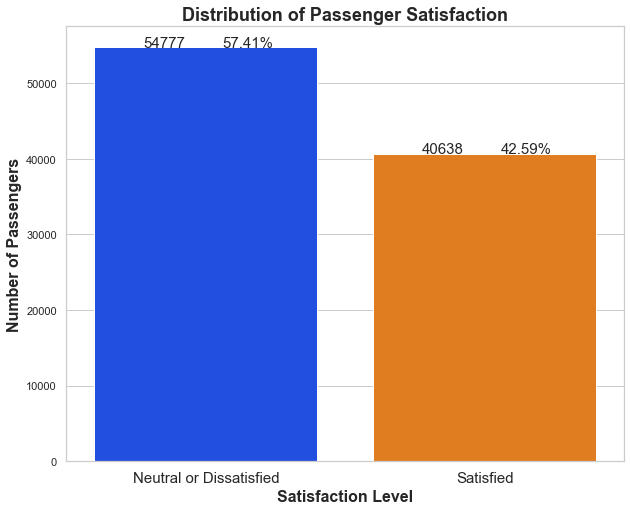

In [50]:
# set seaborn style to whitegrid
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 8)) # set the figure size 
# create a count plot of satisfaction and set the color palette to bright 
ax = sns.countplot(x='satisfaction', data=data, palette='bright') 
# set the title 
plt.title('Distribution of Passenger Satisfaction', fontweight='bold', fontsize='18')
#set the xlabel
plt.xlabel('Satisfaction Level', fontweight='bold', fontsize='16')
#set the ylabel
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
#set the xticks label
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize='15')

# Add count and percentage labels next to each bar
total = float(len(data['satisfaction']))
# loop through the value counts of the satisfaction column
for i, count in enumerate(data['satisfaction'].value_counts()):
    percentage = '{:.2f}%'.format((count/total) * 100) # calculate the percentages
    ax.text(i-0.15, count+50, str(count), ha='center', fontsize='15')  #display the count label
    ax.text(i+0.15, count+50, percentage, ha='center', fontsize='15') # display the percentage label
    
plt.savefig('images/satisfaction.png', format='png') # save the image in the image folder

plt.show()





- **Check for imbalance**: With the data being split 57:43 between dissatisfied and satisfied, there is no need for any special resampling techniques to balance the data. 
- It is worth noting that the data does weigh heavier in favor of neutral or dissatisfied passengers. 

### Gender

In [51]:
# group gender together and get the counts divided up by satisfaction level 
gender_group = data.groupby(['satisfaction', 'gender'])['gender'].count()
gender_group

satisfaction  gender
0             Female    28050
              Male      26727
1             Female    20291
              Male      20347
Name: gender, dtype: int64

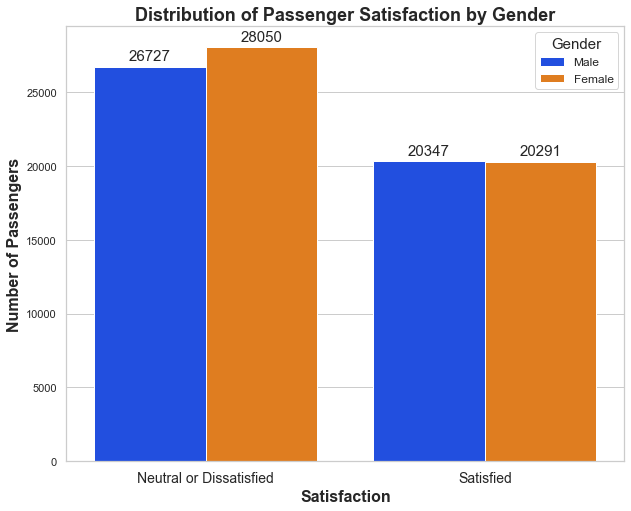

In [52]:
# set to white grid style 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8)) # set figure size 
# create a count plot of satisfaction by gender using the bright color palette
ax = sns.countplot(x='satisfaction', hue='gender', data=data, palette='bright')
#set title 
plt.title('Distribution of Passenger Satisfaction by Gender', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16') # set xlabel
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')# set ylabel
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)#set xticks label 

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Increase the size of the legend and its labels
plt.legend(fontsize='14', title_fontsize='16')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Male', 'Female'], fontsize='12', title='Gender', title_fontsize='15')

plt.savefig('images/gender.png', format='png')

plt.show();

#### Observations:
- There were more female passengers that were dissatisfied than males. 
- The passengers that were satisfied were very close between genders, but with a slight edge in favor of males. 
- There could be several reasons why there are more female neutral or dissatisfied passengers. 
    - Female passengers are more likely to speak out about their poor experiences. 
    - Women are not treated equally while traveling. 
    - There simply more woman in the dataset than men.  

### Type of Travel
- **Type of Travel**: What is the purpose for traveling (Personal Travel, Business Travel)
- For business passengers have different needs and expectations than passengers traveling for pleasure. They pay more money for their tickets in return for a more comfortable flight experience. 
- Personal travel usually means that the price of travel comes out of the pocket of the person traveling. However, due to the more affordable price of traveling for these particular passengers, the flight experience will not be nearly as comfortable as those traveling for business.   

In [53]:
# count type of travel by satisfaction 
type_group = data.groupby(['satisfaction', 'type_of_travel'])['type_of_travel'].count()
type_group

satisfaction  type_of_travel 
0             Business travel    27765
              Personal Travel    27012
1             Business travel    38161
              Personal Travel     2477
Name: type_of_travel, dtype: int64

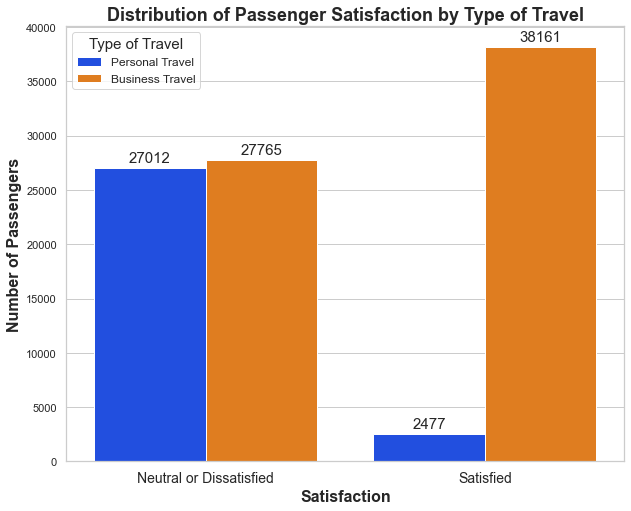

In [54]:
# set seaborn style to whitegrid
sns.set_style('whitegrid')
# set figure size 
plt.figure(figsize=(10, 8))
# create a count plot to visualize satisfaction by type of travel.  make the color palette bright 
ax = sns.countplot(x='satisfaction', hue='type_of_travel', data=data, palette='bright')
# set title
plt.title('Distribution of Passenger Satisfaction by Type of Travel', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16') #set xlabel
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16') #set ylabel
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)# set xticks label

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Increase the size of the legend and its labels
plt.legend(fontsize='14', title_fontsize='16')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Personal Travel', 'Business Travel'], fontsize='12', title='Type of Travel', title_fontsize='15')

plt.savefig('images/type_of_travel.png', format='png')

plt.show();


#### Observations: 
- Looking at this graph in the perspective of airline executives, I would be happy to see the number of satisfied business travelers. 
- However, I would be taken back by the number of business travelers who were rated as neutral/dissatisfied. That number should be addressed by the company immediately. 
- Business travelers are where airlines make their money. They need to work on reducing the number of neutral or dissatisfied passengers. 
    - The average high-yield booking produces 4.3 times more revenue than a typical leisure booking. [OliverWyman](https://www.oliverwyman.com/our-expertise/insights/2022/may/airline-economic-analysis-2021-2022.html)

### Class
- It is clear that amongst the completed surveys of satisfied passengers, the majority come from business class. 
- The clear majority of neutral or dissatisfied passengers were flying in the eco class. 

In [55]:
# group satisfaction by class 
class_group = data.groupby(['satisfaction', 'class'])['class'].count()
class_group

satisfaction  class   
0             Business    14599
              Eco         34831
              Eco Plus     5347
1             Business    31736
              Eco          7272
              Eco Plus     1630
Name: class, dtype: int64

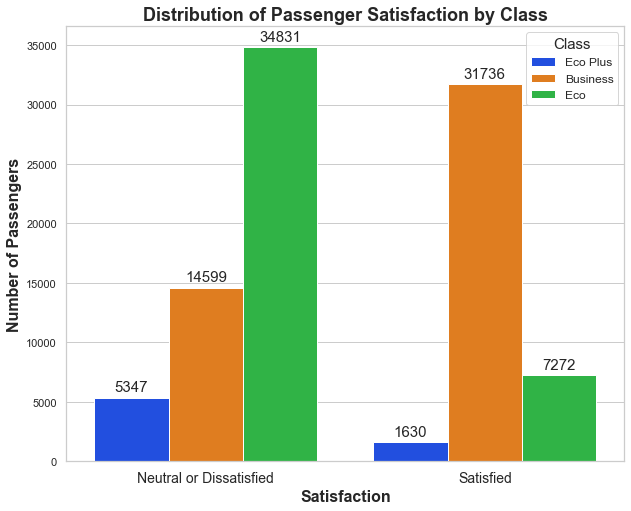

In [56]:
# Set seaborn style to whitegrid 
sns.set_style('whitegrid')

# set figure size 
plt.figure(figsize=(10, 8))

# create a count plot to visualize satisfaction by class. make the color palette bright
ax = sns.countplot(x='satisfaction', hue='class', data=data, palette='bright')

#Set the title and make it bold 
plt.title('Distribution of Passenger Satisfaction by Class', fontweight='bold', fontsize='18')
# set the xlabel and make it bold 
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
#set the ylabel
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
#set the xticks label
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Increase the size of the legend and its labels
plt.legend(fontsize='14', title_fontsize='16')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Eco Plus', 'Business', 'Eco'], fontsize='12', title='Class', title_fontsize='15')

plt.savefig('images/class.png', format='png') # save image

plt.show();

#### Observations:
- It is clear that passengers flying economy are the majority of the neutral or dissatisfied group. Business class passengers make up the second most, and the smallest amount of neutral or dissatisfied passengers, come from the economy plus group. 
- Business class make up the majority of satisfied passengers, with economy second, and eco plus third. 
- Business class passengers make up the majority of the dataset. 

### Customer Type
- Returning customers are important for airlines because they tend to be more loyal and profitable. 
- They have already experienced the airline's services and are satisfied enough to use them again, which means that the airline has met their expectations. 
- Returning customers also tend to be more likely to purchase additional services, such as seat upgrades, additional baggage, or airport lounge access. 
- Additionally, they are more likely to recommend the airline to others, which can help to attract new customers. - Retaining existing customers can be more cost-effective than attracting new ones.

In [57]:
# Group satisfaction by customer type
cust_type_group = data.groupby(['satisfaction', 'customer_type'])['customer_type'].count()
cust_type_group

satisfaction  customer_type      
0             First-time Customer    12584
              Returning Customer     42193
1             First-time Customer     2758
              Returning Customer     37880
Name: customer_type, dtype: int64

- The majority of the dataset is comprised of surveys collected from returning customers. 

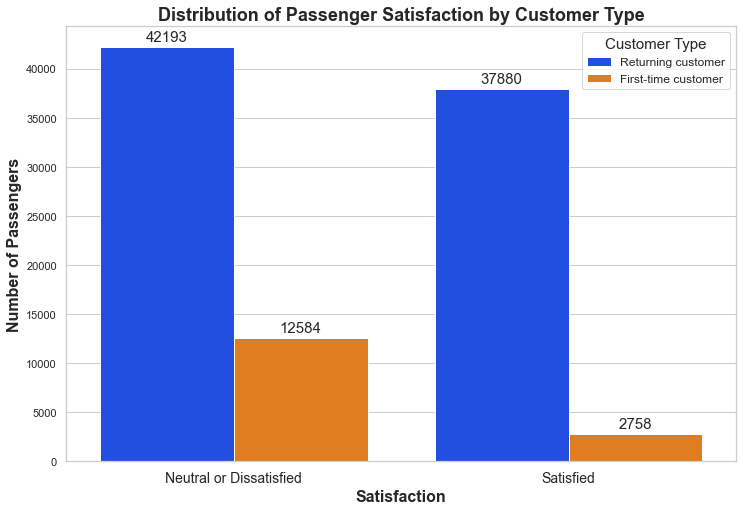

In [58]:
# set seaborn style to whitegrid
sns.set_style('whitegrid')
#set the figure size 
plt.figure(figsize=(12, 8))

#create a count plot to visualize satisfaction by customer type. make the color palette bright 
ax = sns.countplot(x='satisfaction', hue='customer_type', data=data, palette='bright')

# Set the title and make it bold 
plt.title('Distribution of Passenger Satisfaction by Customer Type', fontweight='bold', fontsize='18')
# set the xlabel and make it bold 
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
#set the ylabel and make it bold 
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
# set the xticks labels
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')


# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Returning customer', 'First-time customer'], fontsize='12', title='Customer Type', title_fontsize='15')

plt.savefig('images/customer_type.png', format='png') #save image 

plt.show();

#### Observations:
- There were significantly more returning customers in this dataset compared to first-time customers.
- It is good to see that the majority of returning customers were satisfied, but also alarming that there were more returning customers that were classified as unsatisfied. 
- Action must be taken to satisfy these loyal customers that had neutral or dissatisfied experiences. 

### Leg Room
- Leg room and seat comfort go hand in hand. Leg room on a flight directly affects the comfort and satisfaction of customers during their flights. 
- When passengers have sufficient leg room, they are more likely to feel comfortable and relaxed, which can lead to a more enjoyable travel experience.
- Conversely, when passengers do not have enough leg room, they may feel cramped, uncomfortable, and restless, which can lead to a negative experience and even physical discomfort or pain.

In [59]:
# Group satisfaction by leg room rating
leg_room_group = data.groupby(['satisfaction', 'leg_room'])['leg_room'].count()
leg_room_group

satisfaction  leg_room
0             1            7756
              2           13336
              3           13798
              4           11178
              5            8709
1             1            1607
              2            4448
              3            4571
              4           15826
              5           14186
Name: leg_room, dtype: int64

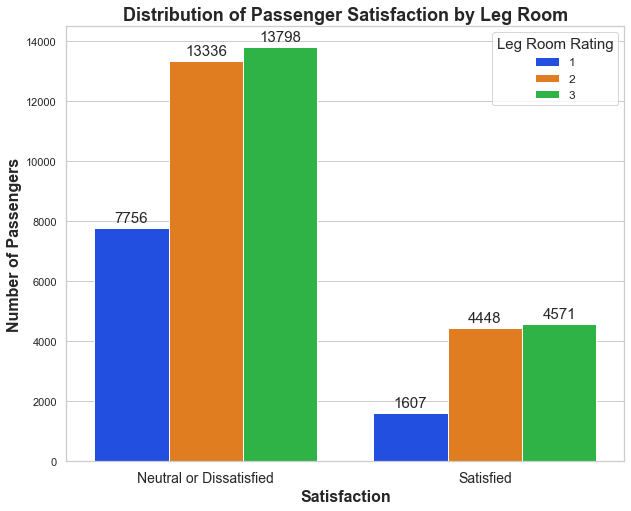

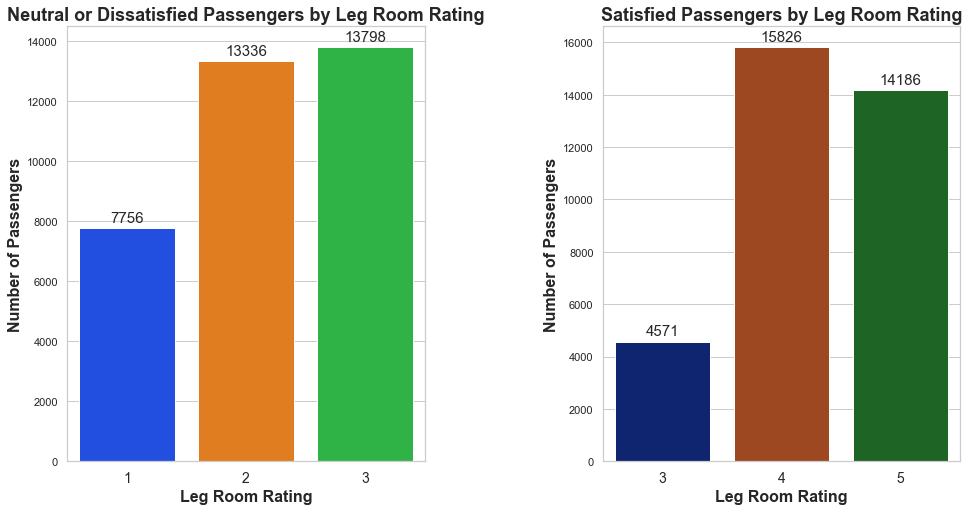

In [60]:
# set seaborn style to whitegrid
sns.set_style('whitegrid')
#set the plot size
plt.figure(figsize=(10, 8))

# Create countplot to visualize satisfaction by leg room. make the color palette bright
ax = sns.countplot(x='satisfaction', hue='leg_room', data=data, palette='bright', hue_order=[1, 2, 3])
# set the title and make it bold 
plt.title('Distribution of Passenger Satisfaction by Leg Room', fontweight='bold', fontsize='18')
#set the xlabel and make it bold 
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
#set the ylabel and make it bold 
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
# set the xticks labels
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['1', '2', '3'], fontsize='12', title='Leg Room Rating', title_fontsize='15')

plt.savefig('images/leg_room.png', format='png')

# Create two separate data frames for not satisfied and satisfied groups
not_satisfied = data.loc[data['satisfaction'] == 0]
satisfied = data.loc[data['satisfaction'] == 1]

# Create countplots for each group separately
fig, axes = plt.subplots(1, 2, figsize=(16, 8))


sns.set_style('whitegrid')

# Plot countplot for not satisfied group
sns.countplot(x='leg_room', data=not_satisfied, palette='bright', hue_order=[1, 2, 3, 4, 5], order=[1, 2, 3], ax=axes[0])
axes[0].set_title('Neutral or Dissatisfied Passengers by Leg Room Rating', fontweight='bold', fontsize='18')
axes[0].set_xlabel('Leg Room Rating', fontweight='bold', fontsize='16')
axes[0].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[0].set_xticklabels(['1', '2', '3'], fontsize=14)

# Add count values to the top of each bar
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Plot countplot for satisfied group
sns.countplot(x='leg_room', data=satisfied, palette='dark', hue_order=[1, 2, 3, 4, 5], order=[3, 4, 5], ax=axes[1])
axes[1].set_title('Satisfied Passengers by Leg Room Rating', fontweight='bold', fontsize='18')
axes[1].set_xlabel('Leg Room Rating', fontweight='bold', fontsize='16')
axes[1].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[1].set_xticklabels(['3', '4', '5'], fontsize=14)

# Add count values to the top of each bar
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# create more space between the two bottom graphs
plt.subplots_adjust(wspace=0.5, hspace=0.5)    

plt.savefig('images/leg_room_2.png', format='png')



plt.show()

#### Observations: 
- From the graphs above, it is clear that if a airline passenger rated their leg room with a rating of 1-3, they were more likely to be dissatisfied with their experience. 
- Oppositely, if a passenger had a rating of 4-5 the likelihood of them being satisfied of with their experience is much higher. 

### Seat Comfort
- Seat comfort is a crucial factor for airline customers as it directly affects their overall satisfaction with the flight experience. 
- Passengers spend hours sitting in their seats, and uncomfortable seats can lead to physical discomfort, fatigue, and even injuries such as back pain. 
- Additionally, uncomfortable seats can negatively impact a passenger's mood and perception of the flight, leading to lower levels of satisfaction and potentially deterring them from flying with the airline again in the future.
- Ensuring comfortable seats can be a key differentiator for airlines in a highly competitive industry.

In [61]:
# group satisfaction by seat comfort rating
seat_comfort_group = data.groupby(['satisfaction', 'seat_comfort'])['seat_comfort'].count()
seat_comfort_group

satisfaction  seat_comfort
0             1                8664
              2               10798
              3               13875
              4               13016
              5                8424
1             1                2094
              2                2686
              3                3296
              4               16561
              5               16001
Name: seat_comfort, dtype: int64

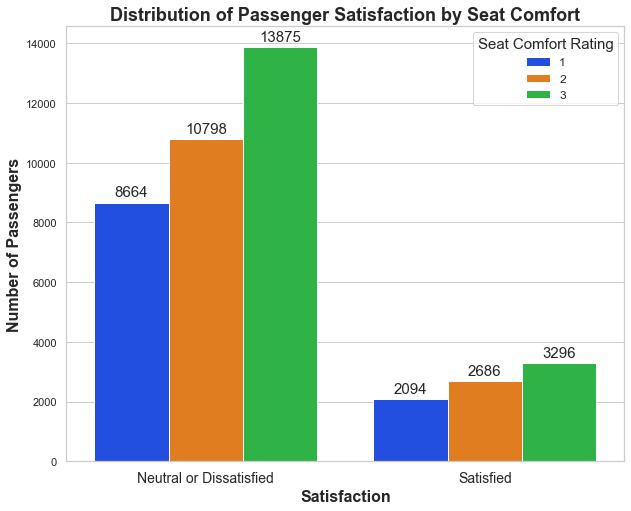

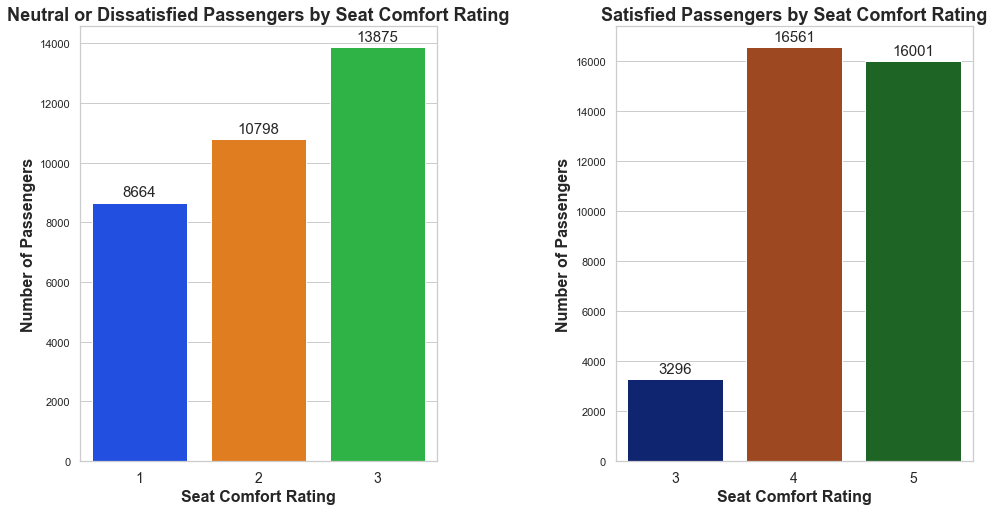

In [62]:
# Set seaborn style to whitegrid
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

#create a countplot to visualize satisfaction by seat comfort. With the color palette bright 
ax = sns.countplot(x='satisfaction', hue='seat_comfort', data=data, palette='bright', hue_order=[1, 2, 3])
# Set title and make it bold
plt.title('Distribution of Passenger Satisfaction by Seat Comfort', fontweight='bold', fontsize='18')
# Set xlabels and make it bold 
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
#set ylabel and make it bold 
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
# set the xticks labels
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['1', '2', '3'], fontsize='12', title='Seat Comfort Rating', title_fontsize='15')

plt.savefig('images/seat_comfort.png', format='png')

# Create two separate data frames for not satisfied and satisfied groups
not_satisfied = data.loc[data['satisfaction'] == 0]
satisfied = data.loc[data['satisfaction'] == 1]

# Create countplots for each group separately
fig, axes = plt.subplots(1, 2, figsize=(16, 8))


sns.set_style('whitegrid')

# Plot countplot for not satisfied group
sns.countplot(x='seat_comfort', data=not_satisfied, palette='bright', hue_order=[1, 2, 3, 4, 5], order=[1, 2, 3], ax=axes[0])
axes[0].set_title('Neutral or Dissatisfied Passengers by Seat Comfort Rating', fontweight='bold', fontsize='18')
axes[0].set_xlabel('Seat Comfort Rating', fontweight='bold', fontsize='16')
axes[0].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[0].set_xticklabels(['1', '2', '3'], fontsize=14)

# Add count values to the top of each bar
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Plot countplot for satisfied group
sns.countplot(x='seat_comfort', data=satisfied, palette='dark', hue_order=[1, 2, 3, 4, 5], order=[3, 4, 5], ax=axes[1])
axes[1].set_title('Satisfied Passengers by Seat Comfort Rating', fontweight='bold', fontsize='18')
axes[1].set_xlabel('Seat Comfort Rating', fontweight='bold', fontsize='16')
axes[1].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[1].set_xticklabels(['3', '4', '5'], fontsize=14)

# Add count values to the top of each bar
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# create more space between the two bottom graphs
plt.subplots_adjust(wspace=0.5, hspace=0.5)    

plt.savefig('images/seat_comfort_2.png', format='png')



plt.show()

#### Observations:
- It is evident, that passengers that were satisfied were consistently rating their seat comfort as a 4 or 5. 
- Oppositely, passengers that were neutral/dissatisfied had a rating of 1-3.
- In the top graph, it is clear that if a passenger rated their seat comfort from 1-3, they greatly increased the chance to be neutral or dissatisfied. 
- I believe comfortable seats are a feature that a lot of airlines over look. Having comfortable seats could be a huge difference maker in a competitive market. 


### Inflight Service
- Inflight service is important for airlines because it plays a significant role in enhancing the overall experience of passengers during a flight. 
- This includes factors such as food and drink service, onboard entertainment, on-board service, leg room service, and cleanliness. 
- Inflight service can help differentiate an airline from its competitors and can influence a passenger's decision to choose one airline over another. 
- Additionally, providing good inflight service can lead to higher customer satisfaction and increased loyalty, which can lead to repeat business and positive word-of-mouth recommendations. 
- Therefore, airlines should place a strong emphasis on providing high-quality inflight service to their passengers.

In [63]:
inflight_service_group = data.groupby(['satisfaction', 'inflight_service'])['inflight_service'].count()
inflight_service_group

satisfaction  inflight_service
0             1                    4616
              2                    7554
              3                   14714
              4                   18427
              5                    9466
1             1                    1623
              2                    2905
              3                    4218
              4                   16705
              5                   15187
Name: inflight_service, dtype: int64

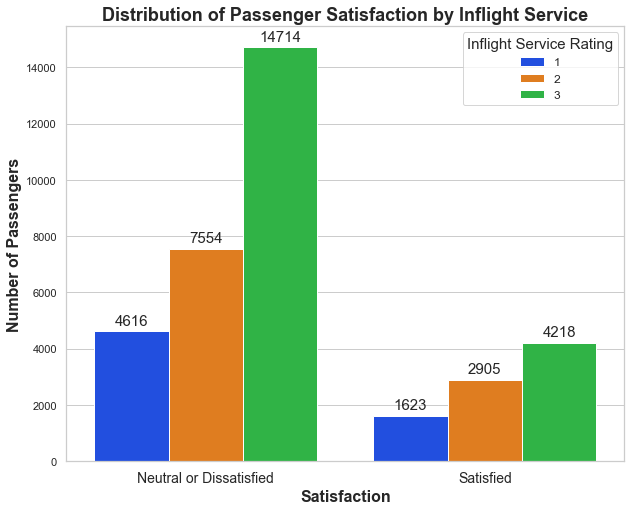

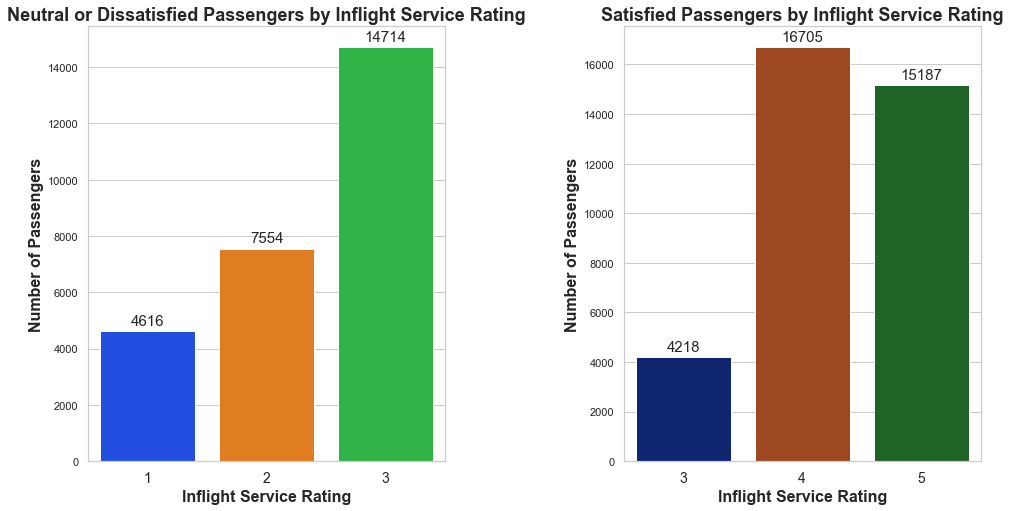

In [64]:
# Set seaborn style to white grid 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))
# create a countplot to vizualize satisfaction by inflight service. make the color palette bright 
ax = sns.countplot(x='satisfaction', hue='inflight_service', data=data, palette='bright', hue_order=[1, 2, 3])
# set the title and make it bold 
plt.title('Distribution of Passenger Satisfaction by Inflight Service', fontweight='bold', fontsize='18')
#set the x label and make it bold
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
#set the y label and make it bold 
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
#set the xticks labels
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['1', '2', '3'], fontsize='12', title='Inflight Service Rating', title_fontsize='15')

plt.savefig('images/inflight_service.png', format='png')

# Create two separate data frames for not satisfied and satisfied groups
not_satisfied = data.loc[data['satisfaction'] == 0]
satisfied = data.loc[data['satisfaction'] == 1]

# Create countplots for each group separately
fig, axes = plt.subplots(1, 2, figsize=(16, 8))


sns.set_style('whitegrid')

# Plot countplot for not satisfied group
sns.countplot(x='inflight_service', data=not_satisfied, palette='bright', hue_order=[1, 2, 3, 4, 5], order=[1, 2, 3], ax=axes[0])
axes[0].set_title('Neutral or Dissatisfied Passengers by Inflight Service Rating', fontweight='bold', fontsize='18')
axes[0].set_xlabel('Inflight Service Rating', fontweight='bold', fontsize='16')
axes[0].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[0].set_xticklabels(['1', '2', '3'], fontsize=14)

# Add count values to the top of each bar
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Plot countplot for satisfied group
sns.countplot(x='inflight_service', data=satisfied, palette='dark', hue_order=[1, 2, 3, 4, 5], order=[3, 4, 5], ax=axes[1])
axes[1].set_title('Satisfied Passengers by Inflight Service Rating', fontweight='bold', fontsize='18')
axes[1].set_xlabel('Inflight Service Rating', fontweight='bold', fontsize='16')
axes[1].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[1].set_xticklabels(['3', '4', '5'], fontsize=14)

# Add count values to the top of each bar
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# create more space between the two bottom graphs
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.savefig('images/inflight_service_2.png', format='png')

plt.show()

#### Observations:
- It is evident that great inflight services well result in satisfied customers. 
- Oppositely, if the inflight services are getting rated 1-3, it highly increases the chances that the passengers are going to be dissatisfied. 
- If the passengers rated the inflight service with 4 or 5 ratings, it greatly increases the likelihood of the passengers being satisfied. 

### Inflight Entertainment
- Some could argue that inflight entertaiment is equally as important as any while flying. It truly enhances the overall passenger experience during the flight. 
- By providing a variety of entertainment options such as movies, TV shows, music, games, and more, airlines can help to alleviate boredom and make long flights more enjoyable for passengers. This can be especially important for longer flights. 

In [65]:
#group satisfaction by inflight entertainment rating
entertainment_group = data.groupby(['satisfaction', 'inflight_entertainment'])['inflight_entertainment'].count()
entertainment_group

satisfaction  inflight_entertainment
0             1                         10014
              2                         13086
              3                         13095
              4                         10542
              5                          8040
1             1                          1050
              2                          2867
              3                          4236
              4                         17085
              5                         15400
Name: inflight_entertainment, dtype: int64

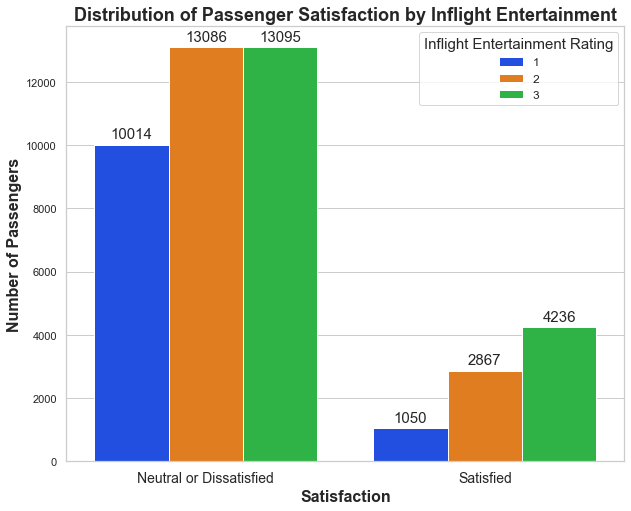

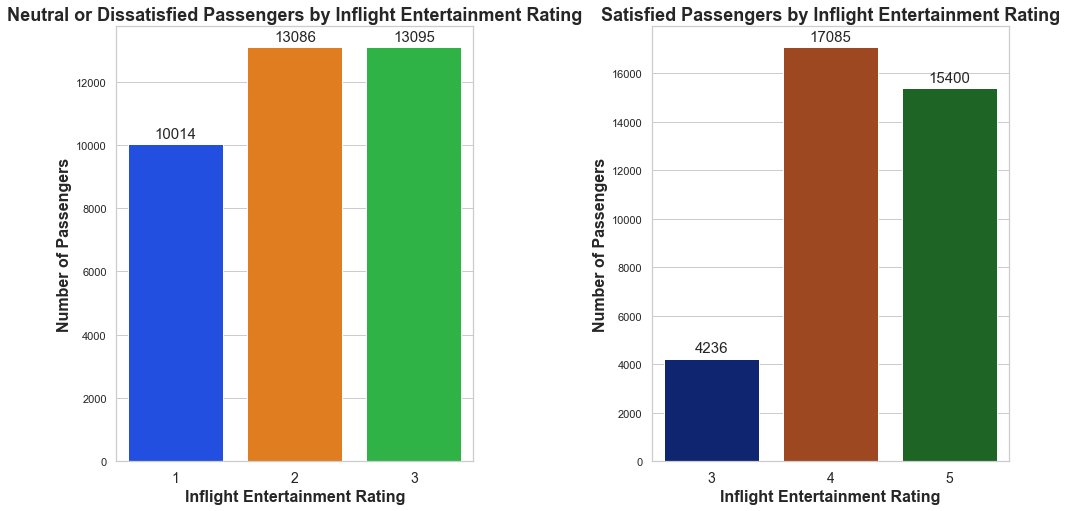

In [66]:
# set seaborn style to whitegrid 
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

# Create a countplot to visualize satisfactio by inflight entertainment. make the color palette bright
ax = sns.countplot(x='satisfaction', hue='inflight_entertainment', data=data, palette='bright', hue_order=[1, 2, 3])

# Set the title, x-axis label, and y-axis label of the plot.
plt.title('Distribution of Passenger Satisfaction by Inflight Entertainment', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['1', '2', '3'], fontsize='12', title='Inflight Entertainment Rating', title_fontsize='15')

plt.savefig('images/entertain.png', format='png')

# Create two separate data frames for not satisfied and satisfied groups
not_satisfied = data.loc[data['satisfaction'] == 0]
satisfied = data.loc[data['satisfaction'] == 1]

# Create countplots for each group separately
fig, axes = plt.subplots(1, 2, figsize=(16, 8))


sns.set_style('whitegrid')

# Plot countplot for not satisfied group
sns.countplot(x='inflight_entertainment', data=not_satisfied, palette='bright', hue_order=[1, 2, 3, 4, 5], order=[1, 2, 3], ax=axes[0])
axes[0].set_title('Neutral or Dissatisfied Passengers by Inflight Entertainment Rating', fontweight='bold', fontsize='18')
axes[0].set_xlabel('Inflight Entertainment Rating', fontweight='bold', fontsize='16')
axes[0].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[0].set_xticklabels(['1', '2', '3'], fontsize=14)

# Add count values to the top of each bar
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Plot countplot for satisfied group
sns.countplot(x='inflight_entertainment', data=satisfied, palette='dark', hue_order=[1, 2, 3, 4, 5], order=[3, 4, 5], ax=axes[1])
axes[1].set_title('Satisfied Passengers by Inflight Entertainment Rating', fontweight='bold', fontsize='18')
axes[1].set_xlabel('Inflight Entertainment Rating', fontweight='bold', fontsize='16')
axes[1].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[1].set_xticklabels(['3', '4', '5'], fontsize=14)

# Add count values to the top of each bar
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

#create space between the two bottom graphs
plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.savefig('images/entertain_2.png', format='png')

plt.show()

#### Observations:
- The Above graphs show that when passengers rate their inflight entertainment from 1-3, it is a strong likelihood that they will be classified as neutral or dissatisfied. 
- On the other hand, when the rating for inflight entertainment was a 4 or 5, the likelihood of the passenger being classified as satisfied was very high. 
- It is evident, that inflight entertainment is a strong factor when trying to give airline passengers a great experience. 

## Feature Selection
- Feature selection is an important process for several reasons:
    - Improves model performance. 
        - You want to remove irrelevant features. 
    - Reduces overfitting. 
        - Too many features can lead to overfitting.
    - Reducing computational time and storage requirements. 
    - Improving interpretability. 
        - Using fewer features can make the model easier to understand. 

In [67]:
# print first 5 rows of the dataset
data.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,total_delay_in_minutes
0,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,43.0
1,Male,First-time Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,7.0
2,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,0.0
3,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,20.0
4,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0.0


#### Correlation Matrix and Heatmap
- This is the next step of feature selection.
- When reading a heat map and correlation matrix, you want to look at each coordinate and select the largest numbers. 
    - The closer the number is to 1, the higher the correlation, making it a strong feature to select for you modeling. 
- The heat map is a more visually appeasing version of a correlation matrix. The lighter the color is, the weaker the relationship is. 
- In this case I visually detect 5 variables that have weak relationships with our target variable, 'satisfaction'.
    - **age**
    - **departure/arrival_time_convenience**
    - **gate_location**
    - **total_delay_in_minutes**

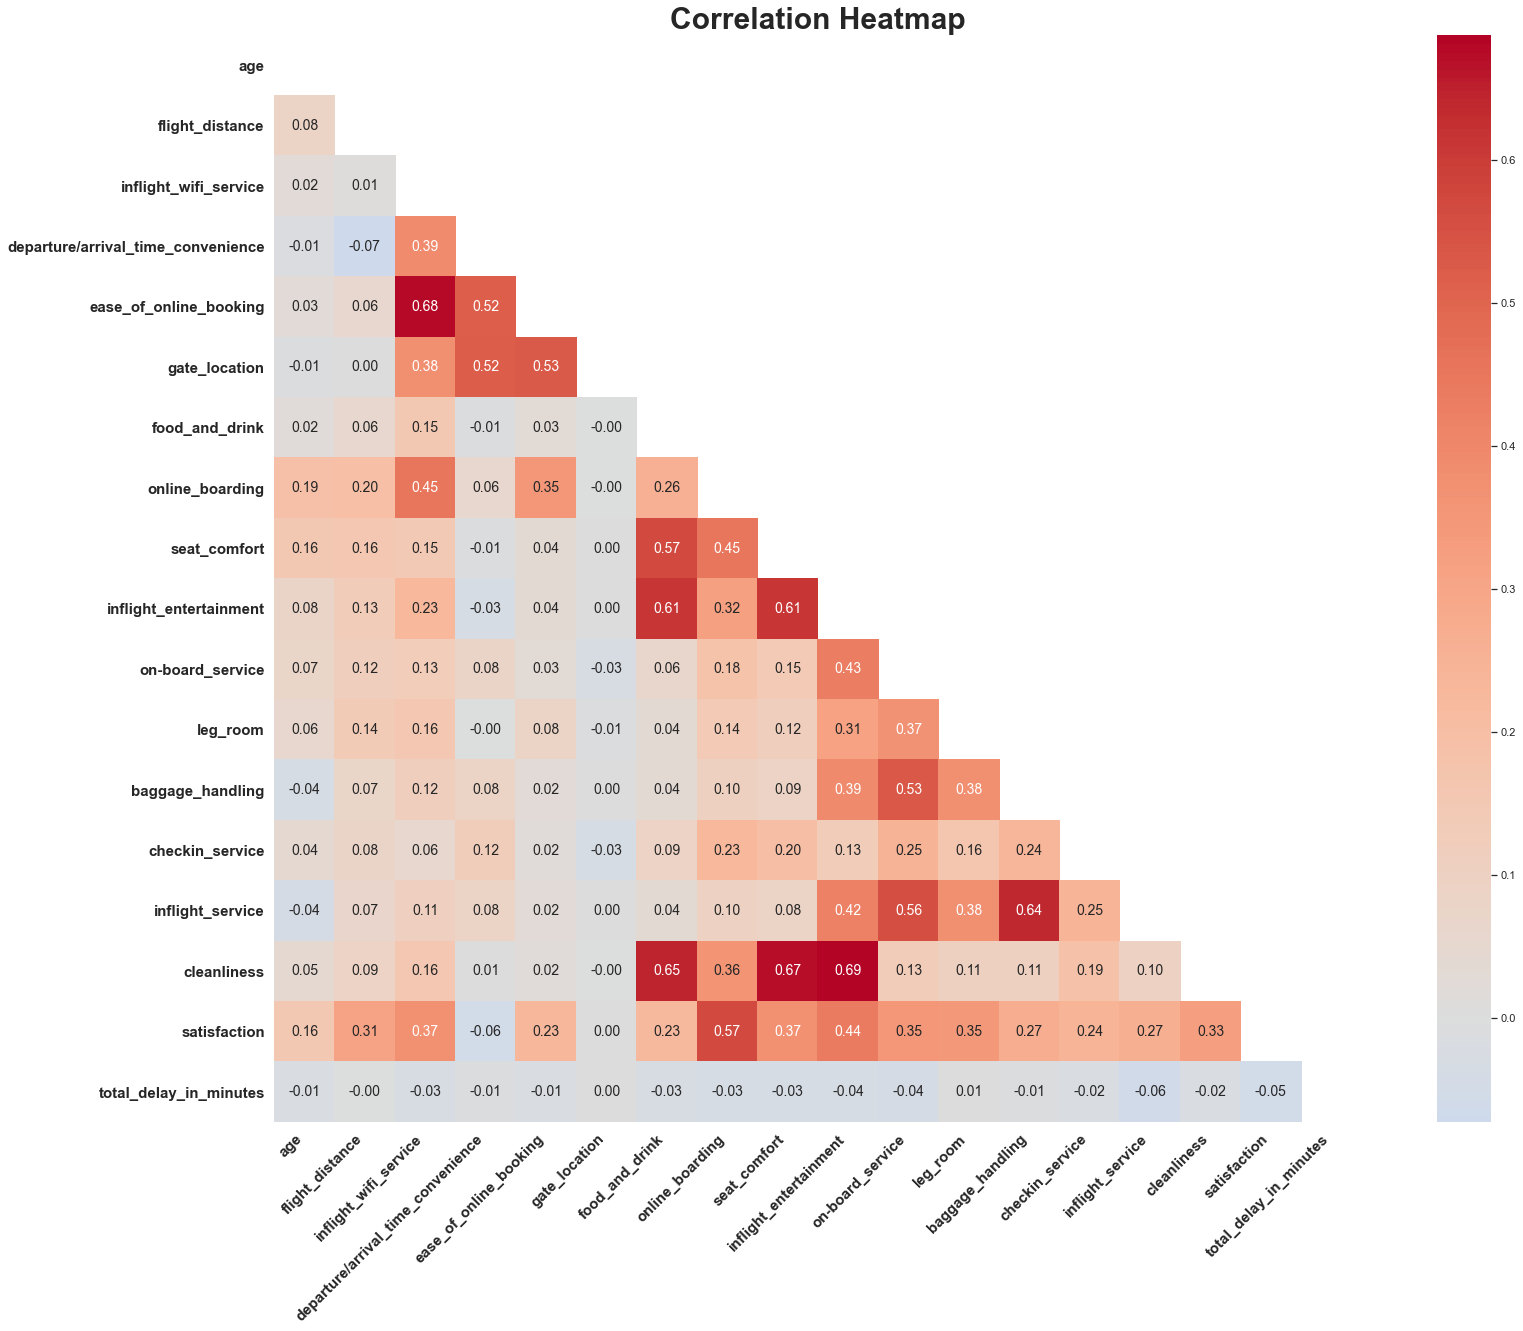

In [68]:
# Create a heatmap using Seaborn's 'sns.heatmap()' function to visualize the correlation between features in the dataset.
# The correlation matrix is first calculated using the 'corr()' method of the dataset.
# The heatmap is plotted using the 'corr_matrix', with the mask parameter to hide the upper triangle of the plot. 
# The 'annot' parameter is set to True to display the correlation values in each cell, and the 'fmt' parameter is used to format the values to 2 decimal places.
# The 'cmap' parameter is used to specify the color scheme for the plot. In this case, the 'coolwarm' color map is used.
# The 'center' parameter sets the value at which the colors will be centered in the plot, and 'square' parameter makes sure that the heatmap is square shaped.
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(27,20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"fontsize": 14}, fmt='.2f', cmap='coolwarm', center=0, square=True, ax=ax)

# Format the x-axis and y-axis labels, as well as the title of the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize='15', fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize='15', fontweight='bold')
plt.title('Correlation Heatmap', fontweight='bold', fontsize = '30')

plt.show()

In [69]:
# correlation matrix as satisfaction as the target
satisfaction_corr = data.corr()['satisfaction'].map(abs).sort_values(ascending=False)
satisfaction_corr

satisfaction                          1.000000
online_boarding                       0.569430
inflight_entertainment                0.438129
seat_comfort                          0.374924
inflight_wifi_service                 0.374004
on-board_service                      0.349038
leg_room                              0.345042
cleanliness                           0.327679
flight_distance                       0.307627
baggage_handling                      0.272755
inflight_service                      0.268044
checkin_service                       0.242945
ease_of_online_booking                0.230243
food_and_drink                        0.226694
age                                   0.155291
departure/arrival_time_convenience    0.056881
total_delay_in_minutes                0.054974
gate_location                         0.004567
Name: satisfaction, dtype: float64

- Just to confirm with the heatmap, this list of variables confirms that in fact age, departure/arrival_time_convenience, total_delay_in_minutes, and gate_location have the weakest relationships to our target variable satisfaction. 
- The next step will be to remove these variables from the dataset before we begin modeling.  

#### Drop weak correlated variables
- Improving model accuracy: Weakly correlated variables are not providing much useful information to the model, so removing them can improve the accuracy of the model by reducing noise and allowing the model to focus on the most relevant variables.

- Reducing complexity: Including too many variables in a model can lead to overfitting and decrease the model's generalizability. Removing weakly correlated variables reduces the complexity of the model and can prevent overfitting.

- Speeding up computation: Including too many variables in a model can also increase the computational cost and slow down the training and prediction time. Removing weakly correlated variables can speed up computation and make the model more efficient.

In [70]:
# drop columns
data.drop(['age', 'departure/arrival_time_convenience', 'total_delay_in_minutes', 
                              'gate_location'], axis=1, inplace=True)

In [71]:
# Check if columns have been removed from the final dataframe
print(data.columns)

Index(['gender', 'customer_type', 'type_of_travel', 'class', 'flight_distance',
       'inflight_wifi_service', 'ease_of_online_booking', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on-board_service', 'leg_room', 'baggage_handling', 'checkin_service',
       'inflight_service', 'cleanliness', 'satisfaction'],
      dtype='object')


- age, departure/arrival_time_convenience, total_delay_in_minutes, and gate_location have been dropped from the dataset

## Prepare Data for Modeling
- Create X and Y variables.
    - X = independent variables.
    - y = dependent variable.
- Split the data in 80/20 train/test. 

#### Create X and y variables

In [72]:
# Create X
X = data.drop('satisfaction', axis=1)

# Create y
y = data['satisfaction']

#### Perform train/test split 
- The original dataset is divided into two parts: X, which contains the features, and y, which contains the target variable (in this case, the passenger satisfaction).

- The function train_test_split is used to randomly split the data into a training set (X_train, y_train) and a test set (X_test, y_test). The parameter test_size is set to 0.25, which means that 25% of the data will be used for testing and the remaining 75% for training.

- The parameter random_state is set to 42 to ensure that the same random splits are generated every time the code is run. This is important for reproducibility and to ensure that the results can be compared across different runs.

In [73]:
# create a train test split with a 75/25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Baseline Model : Logistic Regression

#### Define Which Columns To Encode 
- This block of code show the how the categorical data is going to be divided up prior to encoding in the pipeline. 
- Ordinal categorical data is the survey columns that have rating from 1-5. 
- Categorical data (gender, customer_type, type_of_travel, and class) are nominal because there is no order or hierarchy.

In [74]:
# create variable for ordinal categorical data
ordinal_cols = ['inflight_wifi_service',  
                'ease_of_online_booking', 
                'food_and_drink', 
                'online_boarding', 
                'seat_comfort', 
                'inflight_entertainment', 
                'on-board_service', 
                'leg_room', 
                'baggage_handling', 
                'checkin_service',
                'inflight_service',
                'cleanliness']

# create categorical_cols that are nominal 
categorical_cols = ['gender', 'customer_type', 'type_of_travel', 'class']

# numerical columns
numerical_cols = ['flight_distance']

#### Logistic Regression Pipeline
- A pipeline is a way of chaining data processing components together in a sequence, such that the output of each component is the input to the next. It allows us to streamline the workflow of data preprocessing and modeling by combining several steps into one cohesive unit.

- By using a pipeline, we can simplify the code for our machine learning tasks and reduce the risk of errors in data preprocessing, as well as making it easier to apply the same sequence of transformations to new data.

In [75]:
# Create the encoding transformer to preprocess the data
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),# encode ordinal columns
    ('onehot_encoder', OneHotEncoder(), categorical_cols) # encode categorical columns
], remainder='passthrough') # leave other columns unchanged

# Create the pipeline for Logistic Regression
pipeline = Pipeline([
    ('encoder', encoder), # encode and preprocess data
    ('scaler', MinMaxScaler()), # apply feature scaling to normalized between 0 and 1
    ('clf', LogisticRegression(solver='liblinear', random_state=42)) # logistic regression classifier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

#Generate predictions for the training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Print the classification reports for the training data
print('Classification report for logistic regression training data:')
print(classification_report(y_train, y_train_pred, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the test data
conf_mat = confusion_matrix(y_train, y_train_pred)
print('Confusion matrix for training data:')
print(conf_mat)

# Check the AUC of predictions for training data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('==============================================================')

# Print the classification reports for the test data
print('Classification report for logistic regression test data:')
print(classification_report(y_test, y_test_pred, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the test data
conf_mat = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix for test data:')
print(conf_mat)

# Check the AUC of predictions for test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)

Classification report for logistic regression training data:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.91      0.91     40987
              satisfied       0.88      0.87      0.88     30574

               accuracy                           0.90     71561
              macro avg       0.89      0.89      0.89     71561
           weighted avg       0.90      0.90      0.90     71561

Confusion matrix for training data:
[[37448  3539]
 [ 3924 26650]]
AUC: 0.8926556022261638


Classification report for logistic regression test data:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.91      0.91     13790
              satisfied       0.88      0.87      0.87     10064

               accuracy                           0.89     23854
              macro avg       0.89      0.89      0.89     23854
           weighted avg       0.89      0.89      0.89     23854

Con

#### Observations: 
- From the classification reports and confusion matrices, it can be seen that the logistic regression model performed well in predicting customer satisfaction. The precision and recall for both the training and test data are high, indicating that the model is good at correctly predicting both classes. The f1-scores are also high, indicating a good balance between precision and recall.

- The confusion matrices show that the model had a higher number of false positives for the satisfied class than false negatives, meaning that the model was more likely to incorrectly predict a satisfied customer than a dissatisfied one. However, overall, the model was able to correctly predict customer satisfaction with an accuracy of around 89%.

- The AUC score of around 0.89 indicates that the model has good discriminatory power in distinguishing between the two classes.

- Overall, the logistic regression model can be considered a good fit for the data and can be used for predicting customer satisfaction for airline passengers.

#### Results on Training Data
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.91, which means that 91% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.91, which means that 91% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.91 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.90.

#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 91%, which means that out of all the customers predicted as neutral or dissatisfied, 91% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 91%, which means that out of all the actual neutral or dissatisfied customers, 91% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 91%.
- **Accuracy**: Overall accuracy of 89%, which means that 89% of the predictions made by the model on the test set were correct.

#### Confusion Matrix For Test Data

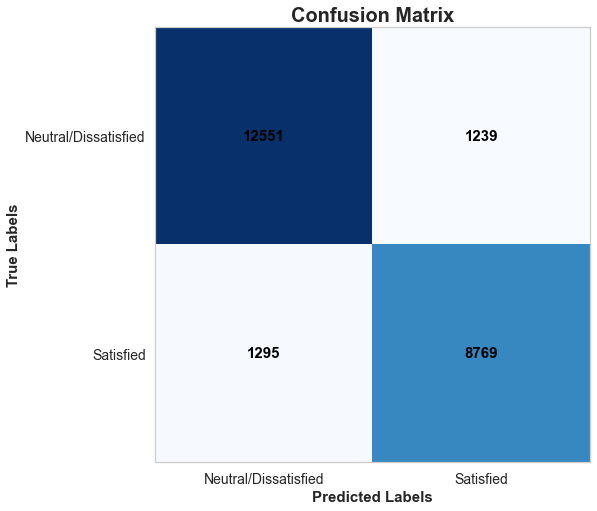

In [76]:
# get confusion matrix
cm_lg = confusion_matrix(y_test, y_test_pred)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_lg, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('Confusion Matrix', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_lg[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

#### Confusion Matrix Results:
- The confusion matrix shows that out of 13,790 neutral or dissatisfied customers in the test set, 12,551 were correctly predicted as neutral or dissatisfied (True Negative), while 1,239 were incorrectly predicted as satisfied (False Positive).
- Similarly, out of 10,064 satisfied customers in the test set, 8,769 were correctly predicted as satisfied (True Positive), while 1,295 were incorrectly predicted as neutral or dissatisfied (False Negative).

#### Check for Imbalance
- The data is pretty well balanced. There is no need to try SMOTE to deal with any issues with imbalanced data. 

In [77]:
# check for imbalance of the training data
print(y_train.value_counts())
print('\n')
print(y_test.value_counts())

0    40987
1    30574
Name: satisfaction, dtype: int64


0    13790
1    10064
Name: satisfaction, dtype: int64


### Logistic Regression Results:
- Using F1 score as the evaluation metric ensures that the model is performing well in both identifying satisfied and dissatisfied customers, which is important for predicting customer satisfaction for airline passengers. 

- This model perfomed slightly better at identifying neutral or dissatisfied customers compared to satisfied customers. 

    - **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>88%</mark> 
    - **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>91%</mark> 
    - **<mark>AUC Score</mark>**: <mark>89%</mark>

### Model 2: Decision Tree (No Tuning)
- The first decision tree model will be a "vanilla" one, with no tuning.  
- The second decision tree model will be run with GridSearchCV to find the best hyperparameters.
    - Decision Trees require a lot of pruning to be accurate. GridSearchCV is an excellent means of searching for the best hyperparameters to get the most accurate model. 

In [78]:
# Create the encoding transformer to preprocess the data

encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols), # encode ordinal columns
    ('onehot_encoder', OneHotEncoder(), categorical_cols) # encode categorical columns
], remainder='passthrough') # leave other columns unchanged

# Create the decision tree pipeline
dt_pipeline = Pipeline([
    ('encoder', encoder), # encode and preprocess data
    ('scaler', MinMaxScaler()), # apply feature scaling to normalized between 0 and 1
    ('clf', DecisionTreeClassifier(random_state=42)) # decision tree classifier
])

# Fit the pipeline on the training data
dt_pipeline.fit(X_train, y_train)

# Generate predictions for the training and test data
y_train_pred_dt = dt_pipeline.predict(X_train)
y_test_pred_dt = dt_pipeline.predict(X_test)

# Print the classification reports for the training data
print('Classification report for decision tree w/out tuning training data:')
print(classification_report(y_train, y_train_pred_dt, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the training data
conf_mat_dt = confusion_matrix(y_train, y_train_pred_dt)
print('Confusion matrix for test data:')
print(conf_mat_dt)

# Check the AUC of predictions for training data
false_positive_rate_dt, true_positive_rate_dt, thresholds_dt = roc_curve(y_train, y_train_pred_dt)
roc_auc_dt = auc(false_positive_rate_dt, true_positive_rate_dt)
print('AUC:', roc_auc_dt)
print('\n')
print('=====================================================================')

# Print the classification reports for the test data
print('Classification report for decision tree w/out tuning test data:')
print(classification_report(y_test, y_test_pred_dt, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the test data
conf_mat_dt = confusion_matrix(y_test, y_test_pred_dt)
print('Confusion matrix for test data:')
print(conf_mat_dt)

# Check the AUC of predictions for test data
false_positive_rate_dt, true_positive_rate_dt, thresholds_dt = roc_curve(y_test, y_test_pred_dt)
roc_auc_dt = auc(false_positive_rate_dt, true_positive_rate_dt)
print('AUC:', roc_auc_dt)

Classification report for decision tree w/out tuning training data:
                         precision    recall  f1-score   support

neutral or dissatisfied       1.00      1.00      1.00     40987
              satisfied       1.00      1.00      1.00     30574

               accuracy                           1.00     71561
              macro avg       1.00      1.00      1.00     71561
           weighted avg       1.00      1.00      1.00     71561

Confusion matrix for test data:
[[40987     0]
 [    1 30573]]
AUC: 0.9999836462353634


Classification report for decision tree w/out tuning test data:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     13790
              satisfied       0.93      0.94      0.93     10064

               accuracy                           0.94     23854
              macro avg       0.94      0.94      0.94     23854
           weighted avg       0.94      0.94      0.94     

#### Observations: 
- From the classification report for decision tree without tuning, it is observed that the model has an accuracy of 100% on the training data, which indicates that the model has overfit the training data. However, on the test data, the accuracy is 94%, which is a good result. The precision and recall for the 'neutral or dissatisfied' class are higher than those for the 'satisfied' class in both the training and test data.

- The confusion matrix for the training data shows that the model has classified all the observations correctly, which is not a good thing as it means that the model has overfit the training data. The confusion matrix for the test data shows that the model has classified 94% of the observations correctly, which is a good result.

- The AUC value for the test data is 0.94, which indicates that the model has good predictive power.

- In summary, the decision tree model without tuning has a good predictive power on the test data but has overfit the training data. Therefore, it is important to tune the model to improve its performance.

#### Confusion Matrix On Test Data

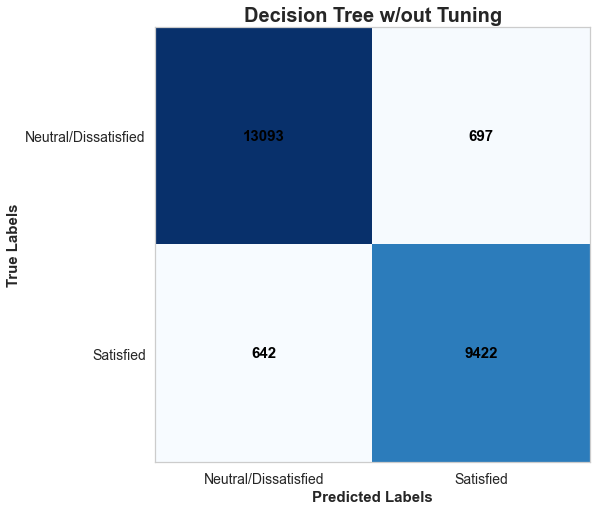

In [79]:
# get confusion matrix
cm_v = confusion_matrix(y_test, y_test_pred_dt)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_v, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('Decision Tree w/out Tuning', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_v[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

#### Confusion matrix observations:
- The confusion matrix is a 2x2 matrix, where the rows represent the actual classes and the columns represent the predicted classes. In this case, the top left cell represents the number of true negatives, which is the number of times the algorithm correctly predicted a passenger would be neutral or dissatisfied (13,093 times). The top right cell represents the number of false positives, which is the number of times the algorithm predicted a passenger would be satisfied but they were actually neutral or dissatisfied (697 times).

- The bottom left cell represents the number of false negatives, which is the number of times the algorithm predicted a passenger would be neutral or dissatisfied but they were actually satisfied (642 times). Finally, the bottom right cell represents the number of true positives, which is the number of times the algorithm correctly predicted a passenger would be satisfied (9,422 times).

- Overall, the confusion matrix shows that the algorithm performed well, with a large number of correct predictions and relatively few false positives and false negatives.

### Decision Tree With No Tuning Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>93%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>94%</mark>

### Decision Tree with GridSearchCV
- GridSearchCV is a method used to tune hyperparameters in machine learning models. In the case of decision trees, hyperparameters such as the maximum depth of the tree and the minimum number of samples required to split an internal node can significantly affect the performance of the model.

- Using GridSearchCV, we can define a range of values for these hyperparameters and the method will perform an exhaustive search over all possible combinations of values to find the set of hyperparameters that gives the best performance on the training data.

- Once the best hyperparameters are identified, we can use them to train a decision tree model and evaluate its performance on the test data. 

In [80]:
# Define the hyperparameters for tuning the model
params = {'clf__max_depth': [2, 3, 5, 7, 9, 13, 20],
          'clf__min_samples_split': [2, 5, 10, 12, 15, 20, 25, 30, 35, 50],
          'clf__min_samples_leaf': [1, 2, 4]}

# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Create the decision tree pipeline
dt_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Create a grid search object 
dt_gs = GridSearchCV(dt_pipeline, params, cv=5)

# Fit the grid search to the training data
dt_gs.fit(X_train, y_train)

# Print the best hyperparameters and best score 
print("Best parameters: ", dt_gs.best_params_)
print("Best score: ", dt_gs.best_score_)

# Fit the pipeline on the training data with the best hyperparameters
dt_pipeline.set_params(**dt_gs.best_params_)
dt_pipeline.fit(X_train, y_train)

# Generate predictions for the training and test data
y_train_pred_dt_best = dt_pipeline.predict(X_train)
y_test_pred_dt_best = dt_pipeline.predict(X_test)

Best parameters:  {'clf__max_depth': 13, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 30}
Best score:  0.9498889106156041


- Now that we have the best parameters for tuning our decision tree, I will run another classification report on the training and test data to see it if performed better on our data. 

In [81]:
# Print the classification reports for the training and test data
print('Classification report for decision tree w/best parameters on training data:')
print(classification_report(y_train, y_train_pred_dt_best, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the training data
conf_mat_dt_best_tr = confusion_matrix(y_train, y_train_pred_dt_best)
print('Confusion matrix for training data:')
print(conf_mat_dt_best_tr)

# Check the AUC of predictions
false_positive_rate_dt, true_positive_rate_dt, thresholds_dt = roc_curve(y_train, y_train_pred_dt_best)
roc_auc_dt = auc(false_positive_rate_dt, true_positive_rate_dt)
print('AUC:', roc_auc_dt)
print('\n')
print('==============================================================================')

print('Classification report for decision tree w/best parameters on test data:')
print(classification_report(y_test, y_test_pred_dt_best, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the test data
conf_mat_dt_best = confusion_matrix(y_test, y_test_pred_dt_best)
print('Confusion matrix for test data:')
print(conf_mat_dt_best)

# Check the AUC of predictions
false_positive_rate_dt, true_positive_rate_dt, thresholds_dt = roc_curve(y_test, y_test_pred_dt_best)
roc_auc_dt = auc(false_positive_rate_dt, true_positive_rate_dt)
print('AUC:', roc_auc_dt)

Classification report for decision tree w/best parameters on training data:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.98      0.96     40987
              satisfied       0.97      0.92      0.95     30574

               accuracy                           0.96     71561
              macro avg       0.96      0.95      0.96     71561
           weighted avg       0.96      0.96      0.96     71561

Confusion matrix for training data:
[[40250   737]
 [ 2357 28217]]
AUC: 0.9524635211777697


Classification report for decision tree w/best parameters on test data:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.98      0.96     13790
              satisfied       0.97      0.92      0.94     10064

               accuracy                           0.95     23854
              macro avg       0.95      0.95      0.95     23854
           weighted avg       0.95     

#### Results on Training Data
- For the training data, the classification report shows a high level of precision and recall for both classes. The accuracy of the model was 0.96, indicating that it correctly predicted the class for 96% of the instances in the training data. 
- The AUC score was 0.9524, which indicates that the model performed well in terms of correctly ranking the classes. 
- The confusion matrix shows that the model predicted 40250 neutral or dissatisfied passengers and 28217 satisfied passengers correctly, but misclassified 737 neutral or dissatisfied passengers and 2357 satisfied passengers.

#### Results On Test Data:
- For the test data, the classification report shows a high level of precision and recall for both classes as well, with an accuracy of 0.95. 
- The AUC score was 0.9476, which indicates that the model performed well in terms of correctly ranking the classes. 
- The confusion matrix shows that the model predicted 13474 neutral or dissatisfied passengers and 9240 satisfied passengers correctly, but misclassified 316 neutral or dissatisfied passengers and 824 satisfied passengers.

#### Confusion Matrix of Test Data

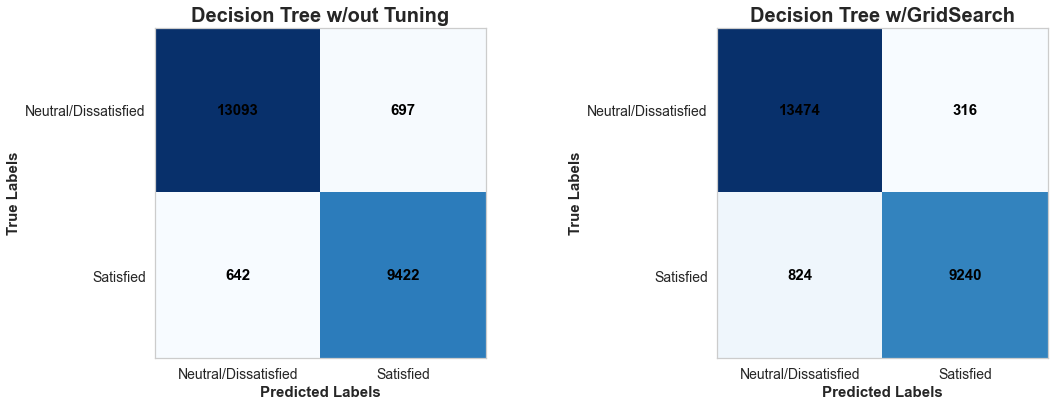

In [82]:
# create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix 
axs[0].imshow(cm_v, cmap='Blues')
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[0].set_title('Decision Tree w/out Tuning', fontweight='bold', fontsize='20')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].xaxis.set_tick_params(labelsize=14)
axs[0].yaxis.set_tick_params(labelsize=14)

# add text boxes in the first confusion matrix 
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_v[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

# plot second confusion matrix
conf_mat_dt_best = confusion_matrix(y_test, y_test_pred_dt_best)
axs[1].imshow(conf_mat_dt_best, cmap='Blues')
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[1].set_title('Decision Tree w/GridSearch', fontweight='bold', fontsize='20')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].yaxis.set_tick_params(labelsize=14)

# add text boxes in the second confusion matrix
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, conf_mat_dt_best[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');
        
# adjust spacing between subplots
plt.subplots_adjust(wspace=0.7)

#display the figure
plt.show()


#### Confusion Matrix Results:
- When comparing the two confusion matrixis, the Decision Tree using GridSearch has the better results for my goals of finding the passengers that were neutral/dissatisfied.
    - The model is better at predicting true negatives, and has a lower number of false positives. This means that the model is better at reducing the number of passengers that were falsely predicted at satisfied when they were actually neutral/dissatisfied.  

### Decision Tree (No Tuning) Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>93%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>94%</mark>

### Decision Tree With GridSearchCV Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>94%</mark> 
- **<mark>AUC Score</mark>**: <mark>95%</mark>

#### Comparing the two models:
- The decision tree with best parameters performs better than the decision tree without tuning. The accuracy score for the decision tree with best parameters on the test data is 0.95, while the accuracy score for the decision tree without tuning on the test data is 0.94. Additionally, the precision, recall, and f1-score for the decision tree with best parameters are higher than those for the decision tree without tuning.

### Model 3: Random Forest
- Like the decision tree models, I will run a vanilla random forest classification model on the training and test data first. 
- I will follow it up with a second random forest classification model using GridSearchCV to see if we get more accuarate predictions. 

#### Create Random Forest Pipeline

In [83]:
# Create the encoding transformer
# This transformer uses OrdinalEncoder for the ordinal columns and OneHotEncoder for the categorical columns
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

#Define the pipeline
# This pipeline includes the encoder, scaler and the Random Forest Classifier
rf_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

#Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

#Generate predictions for the training and test data
y_train_pred_rf = rf_pipeline.predict(X_train)
y_test_pred_rf = rf_pipeline.predict(X_test)

#Print classification report for training data
# This report shows precision, recall, f1-score and support for each class
print('\nClassification Report: **Random Forest With w/out Tuning On Training Data**')
print(classification_report(y_train, y_train_pred_rf, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for Training data
# This matrix shows the actual and predicted classes
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_train_pred_rf))

# Check the AUC of predictions
# This metric measures the area under the curve of the Receiver Operating Characteristic (ROC) curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('========================================================================')

#Print classification report for test data
# This report shows precision, recall, f1-score and support for each class
print('\nClassification Report: **Random Forest w/out Tuning On Test Data**')
print(classification_report(y_test, y_test_pred_rf, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for Test data
# This matrix shows the actual and predicted classes
print('Confusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_test_pred_rf))

# Check the AUC of predictions
# This metric measures the area under the curve of the Receiver Operating Characteristic (ROC) curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)



Classification Report: **Random Forest With w/out Tuning On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       1.00      1.00      1.00     40987
              satisfied       1.00      1.00      1.00     30574

               accuracy                           1.00     71561
              macro avg       1.00      1.00      1.00     71561
           weighted avg       1.00      1.00      1.00     71561

Confusion Matrix - Training Data:
[[40986     1]
 [    0 30574]]
AUC: 0.9999878010100763



Classification Report: **Random Forest w/out Tuning On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96

#### Classification Report On Training Data
- The classification report show perfect scores for precision, recall, f1-score, and accuracy. This is a sign of overfitting the training data. 
#### Classification Report On Test Data
- The model performed very well on the test data, with an accuracy of 0.96, precision of 0.95 and 0.97 for the two classes respectively, recall of 0.98 and 0.94 for the two classes, and F1-score of 0.97 and 0.95 for the two classes, respectively. The weighted average of precision, recall, and F1-score is 0.96, indicating very good performance. The confusion matrix shows that the model made 959 misclassifications out of 23854 samples, and the AUC is 0.956, indicating very good performance.

#### Confusion Matrix of Random Forest w/out Tuning

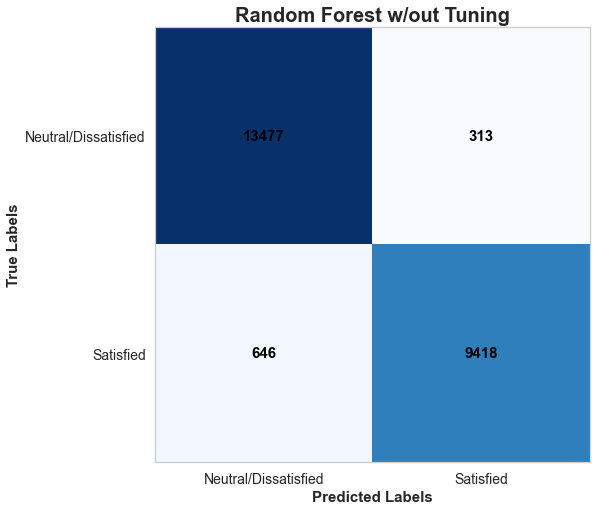

In [84]:
# get confusion matrix
cm_rfv = confusion_matrix(y_test, y_test_pred_rf)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_rfv, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('Random Forest w/out Tuning', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

#Customize and create text boxes in the confusion matrix 

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_rfv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

### Random Forest With No Tuning Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>96%</mark>

### Random Forest with GridSearchCV
- Use GridSearchCV to find the best hyperparameters to get the best model results.
- Due to a long run time compared to the GridSearch on the decision tree, I have removed min_samples_split because it is less critical than parameter. 
- I also decreased the max_depth to help shorten the run time. 

#### Create New Pipeline With GridSearch

In [85]:
# Define the hyperparameters for the tuning
params = {
    'clf__criterion': ['gini', 'entropy'],# Split criterion for Decision Tree
    'clf__n_estimators': [10, 12, 15, 20], # Number of trees in the forest
    'clf__max_depth': [2, 3, 5, 7, 9], # Maximum depth of the tree
    'clf__min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols), # Ordinal encoding for ordinal features
    ('onehot_encoder', OneHotEncoder(), categorical_cols) # One-hot encoding for categorical features
], remainder='passthrough')

#Define the pipeline
# This pipeline includes the encoder, scaler and the Random Forest Classifier
rf_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Create a grid search object 
rf_gs = GridSearchCV(rf_pipeline, params, cv=5) # 5-fold cross-validation

# Fit the pipeline on the training data
rf_gs.fit(X_train, y_train)

# Print the best hyperparameters and best score 
print("Best parameters: ", rf_gs.best_params_) # Display the best hyperparameters
print("Best score: ", rf_gs.best_score_) # Display the best score

# Fit the pipeline on the training data with the best hyperparameters
rf_pipeline.set_params(**rf_gs.best_params_) # Set the best hyperparameters
rf_pipeline.fit(X_train, y_train)

# Generate predictions for the training and test data
y_train_pred_rf_best = rf_gs.predict(X_train) # Predictions on the training data
y_test_pred_rf_best = rf_gs.predict(X_test) # Predictions on the test data

Best parameters:  {'clf__criterion': 'gini', 'clf__max_depth': 9, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 20}
Best score:  0.9412808824134166


In [86]:
# Print classification report for training data
# This report shows precision, recall, f1-score and support for each class
print('\nClassification Report: **Random Forest On Training Data with Best Parameters**')
print(classification_report(y_train, y_train_pred_rf_best, target_names=['neutral or dissatisfied', 'satisfied']))

# Display confusion matrix for training data
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_train_pred_rf_best))

# Check the AUC of predictions for the training data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred_rf_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('================================================================================')

# Print classification report for test data
# This report shows precision, recall, f1-score and support for each class
print('\nClassification Report: **Random Forest On Test Data with Best Parameters**')
print(classification_report(y_test, y_test_pred_rf_best, target_names=['neutral or dissatisfied', 'satisfied']))

# Display confusion matrix for test data
print('Confusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_test_pred_rf_best))

# Check the AUC of predictions for the test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred_rf_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)



Classification Report: **Random Forest On Training Data with Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     40987
              satisfied       0.94      0.93      0.93     30574

               accuracy                           0.94     71561
              macro avg       0.94      0.94      0.94     71561
           weighted avg       0.94      0.94      0.94     71561

Confusion Matrix - Training Data:
[[39080  1907]
 [ 2144 28430]]
AUC: 0.9416740548347174



Classification Report: **Random Forest On Test Data with Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     13790
              satisfied       0.93      0.93      0.93     10064

               accuracy                           0.94     23854
              macro avg       0.94      0.94      0.94     23854
           weighted avg       0.9

#### Results on Training Data:
- The model achieved an overall accuracy of 0.94 on the training data. The precision and recall for the "neutral or dissatisfied" class are 0.95 and 0.95, respectively. This means that when the model predicted a customer is "neutral or dissatisfied", it was correct 95% of the time, and it identified 95% of the actual "neutral or dissatisfied" customers. The precision and recall for the "satisfied" class are 0.94 and 0.93, respectively. This means that when the model predicted a customer is "satisfied", it was correct 94% of the time, and it identified 93% of the actual "satisfied" customers.

#### Results On Test Data:
- The model achieved an overall accuracy of 0.94 on the test data. The precision and recall for the "neutral or dissatisfied" class are 0.95 and 0.95, respectively. This means that when the model predicted a customer is "neutral or dissatisfied", it was correct 95% of the time, and it identified 95% of the actual "neutral or dissatisfied" customers. The precision and recall for the "satisfied" class are 0.93 and 0.93, respectively. This means that when the model predicted a customer is "satisfied", it was correct 93% of the time, and it identified 93% of the actual "satisfied" customers.

- Overall, the model's performance on the test data is very similar to that on the training data, indicating that the model did not overfit to the training data. The AUC score for both training and test data are close to 0.94, indicating that the model's ability to distinguish between positive and negative cases is good.

#### Confusion Matrix On Test Data

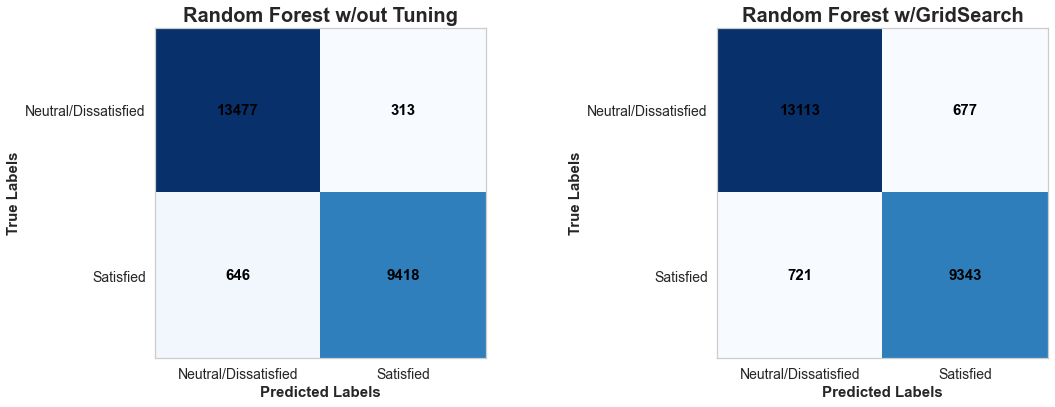

In [87]:
# Create two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix
axs[0].imshow(cm_rfv, cmap='Blues') #make the color theme blue
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[0].set_title('Random Forest w/out Tuning', fontweight='bold', fontsize='20') # Title for first plot 
axs[0].set_xticks([0, 1]) # set the positions of the x-ticks
axs[0].set_yticks([0, 1]) # set the positions of the y-ticks
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) #xaxis tick labels
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) #yaxis tick labels
axs[0].xaxis.set_tick_params(labelsize=14) # set the font size of the x-tick labels
axs[0].yaxis.set_tick_params(labelsize=14) # set the font size of the y-tick labels


#customize the value inside the boxes
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_rfv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

# plot second confusion matrix
cm_rfgs = confusion_matrix(y_test, y_test_pred_rf_best)
axs[1].imshow(cm_rfgs, cmap='Blues') # make the color theme blue
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15') # set the x-axis label
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15') # set the y-axis label
axs[1].set_title('Random Forest w/GridSearch', fontweight='bold', fontsize='20') # title of second plot
axs[1].set_xticks([0, 1]) # set the positions of the x-ticks
axs[1].set_yticks([0, 1]) # set the positions of the y-ticks
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) #xaxis tick labels
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) #yaxis tick labels
axs[1].xaxis.set_tick_params(labelsize=14) # set the font size of the x-tick labels
axs[1].yaxis.set_tick_params(labelsize=14) # set the font size of the y-tick labels

#Customize the values inside the boxes
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_rfgs[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');
        
# adjust spacing between subplots
plt.subplots_adjust(wspace=0.7)

plt.show()


#### Confusion Matrix Results:
- Random forest models tend to perform better when data is not balanced. This is why the model with tuning did not do as well at predicting true negatives, false positives, and false negatives. 
- Overall, the random forest model without tuning performed better at reducing the number of misclassifications with 959 out of 23854. 

### Random Forest (No Tuning) Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>96%</mark>

### Random Forest With GridSearchCV Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>93%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>93%</mark>

### Model 4: CatBoost Classifier
- For this model I will build two models using the catboost classifier.
    - The first model will be run with no tuning.
    - The second model I will use catboost with RandomSearchCV. 
        - It is less computationally expensive than GridSearchCV.

#### CatBoost Pipeline

In [88]:
# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols), # Ordinal encoding for ordinal features
    ('onehot_encoder', OneHotEncoder(), categorical_cols) # One-hot encoding for categorical features
], remainder='passthrough')

#Define the pipeline
cbc_pipeline = Pipeline([
    ('encoder', encoder), # Encoding transformer
    ('scaler', MinMaxScaler()), # Min-max scaling for all features
    ('clf', ctb.CatBoostClassifier(verbose=False, random_state=42)) # CatBoost Classifier without verbose output
])

# Fit the pipeline to the training data 
cbc_pipeline.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_cbc_train = cbc_pipeline.predict(X_train) # Predictions on the training data
y_pred_cbc_test = cbc_pipeline.predict(X_test) # Predictions on the test data

# Display the classification report for the training and test data
print('Classification Report: **CatBoost w/out Tuning On Training Data**')
print(classification_report(y_train, y_pred_cbc_train, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for training data
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_pred_cbc_train))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_cbc_train) # Compute ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate) # Compute AUC score
print('AUC:', roc_auc)
print('\n')
print('==================================================================')

# print classification report for the test data
print('\nClassification Report: **CatBoost w/out Tuning On Test Data**')
print(classification_report(y_test, y_pred_cbc_test, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for test data
print('\nConfusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_pred_cbc_test))

# Check the AUC of predictions for test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_cbc_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)

Classification Report: **CatBoost w/out Tuning On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.99      0.98     40987
              satisfied       0.98      0.95      0.97     30574

               accuracy                           0.97     71561
              macro avg       0.98      0.97      0.97     71561
           weighted avg       0.97      0.97      0.97     71561

Confusion Matrix - Training Data:
[[40533   454]
 [ 1450 29124]]
AUC: 0.9707486998515721



Classification Report: **CatBoost w/out Tuning On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96      0.96     2

#### Results on Training Data:
- For the training data, the CatBoost model without tuning has a precision of 0.97 for neutral or dissatisfied and 0.98 for satisfied customers. It has a recall of 0.99 for neutral or dissatisfied and 0.95 for satisfied customers. The F1-score for neutral or dissatisfied is 0.98 and for satisfied customers is 0.97. The weighted average F1-score is 0.97 and the overall accuracy of the model is 0.97.

- AUC score = 97%

#### Results On Test Data:
- For the test data, the CatBoost model without tuning has a precision of 0.95 for neutral or dissatisfied and 0.97 for satisfied customers. It has a recall of 0.98 for neutral or dissatisfied and 0.94 for satisfied customers. The F1-score for neutral or dissatisfied is 0.97 and for satisfied customers is 0.95. The weighted average F1-score is 0.96 and the overall accuracy of the model is 0.96.

- AUC score = 96%

#### Confusion Matrix On Test Data w/out Tuning

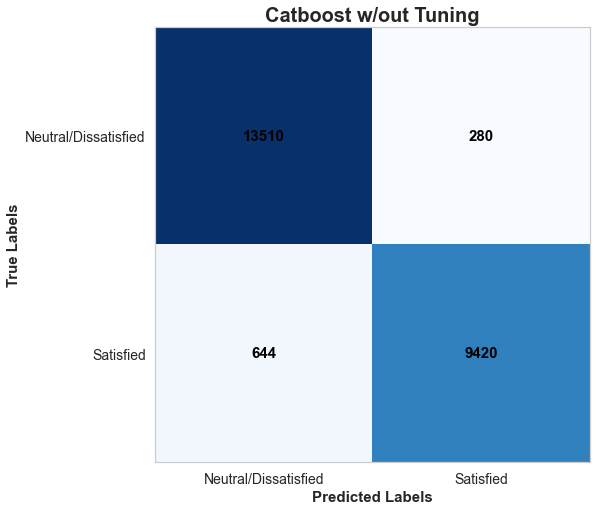

In [89]:
# get confusion matrix
cm_cbv = confusion_matrix(y_test, y_pred_cbc_test)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_cbv, cmap='Blues') # Set a blue color scheme
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15') #set xlabel
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15') # set ylabel
ax.set_title('Catboost w/out Tuning', fontweight='bold', fontsize='20') # set title
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set x axis label
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set y axis label
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# create a text boxes inside the confusion matrix 
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_cbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

#### Confusion matrix observations: 
- The model has correctly classified 13504 instances of neutral or dissatisfied customers and 9425 instances of satisfied customers. However, it has misclassified 286 instances of neutral or dissatisfied as satisfied and 639 instances of satisfied as neutral or dissatisfied.

### CatBoost With No Tuning Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>96%</mark>

### CatBoost with RandomSearchCV
- RandomSearchCV is similar to GridSearchCV, however RandomSearchCV performs a random search over the parameter space, rather than an exhaustive search like GridSearchCV performs. 
- RandomSearchCV is much less computationally expensive making it perform faster, especially for larger datasets. 

#### Create New Pipeline With RandomSearch

In [90]:
# Define the hyperparameters to search
param_dist = {
    'clf__iterations': sp_randint(500, 2000), # number of iterations for the catboost model
    'clf__learning_rate': [0.01, 0.1, 1], # learning rate for the model
    'clf__max_depth': sp_randint(4, 10), # maximum depth of the trees used by the model
    'clf__random_strength': [0, 1, 3, 5, 7, 9], # random strength for the model
    'clf__l2_leaf_reg': [2, 4, 6, 8, 10] # L2 regularization for the model 
}

# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols), # ordinal encoding for features
    ('onehot_encoder', OneHotEncoder(), categorical_cols) # one hot encoding for features 
], remainder='passthrough')

#Define the pipeline
cbc_pipeline = Pipeline([
    ('encoder', encoder), # encoding transformer
    ('scaler', MinMaxScaler()), # min max scaling for the features 
    ('clf', ctb.CatBoostClassifier(verbose=False)) # catboost classifier with verbose=false to prevent a long print block
])

# Create a randomized search object on the catboost classifier using the best parameters 
cbc_rs = RandomizedSearchCV(cbc_pipeline, param_distributions=param_dist, 
                            cv=5, n_iter=20, n_jobs=-1, verbose =1, random_state=42)

# Fit the randomized search to the training data
cbc_rs.fit(X_train, y_train)

# Print the best hyperparameters and best score 
print("Best parameters: ", cbc_rs.best_params_)
print("Best score: ", cbc_rs.best_score_)

# Fit the pipeline on the training data with the best hyperparameters
cbc_pipeline.set_params(**cbc_rs.best_params_)
cbc_pipeline.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_cbc_train_best = cbc_pipeline.predict(X_train)
y_pred_cbc_test_best = cbc_pipeline.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.2min finished


Best parameters:  {'clf__iterations': 1229, 'clf__l2_leaf_reg': 8, 'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__random_strength': 9}
Best score:  0.9594192115139458


In [91]:
# Display the classification report for the training and test data
print('Classification Report: **CatBoost On Training Data With Best Parameters**')
print(classification_report(y_train, y_pred_cbc_train_best, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for training data
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_pred_cbc_train_best))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_cbc_train_best) # Roc calculation
roc_auc = auc(false_positive_rate, true_positive_rate) #auc calculation
print('AUC:', roc_auc)
print('\n')
print('==================================================================')

#print the classification report for the test data
print('\nClassification Report: **CatBoost On Test Data With Best Parameters**')
print(classification_report(y_test, y_pred_cbc_test_best, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for test data
print('\nConfusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_pred_cbc_test_best))

# Check the AUC of predictions for the test data 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_cbc_test_best) # ROC score
roc_auc = auc(false_positive_rate, true_positive_rate) # AUC score
print('AUC:', roc_auc)

Classification Report: **CatBoost On Training Data With Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.99      0.98     40987
              satisfied       0.98      0.95      0.97     30574

               accuracy                           0.97     71561
              macro avg       0.97      0.97      0.97     71561
           weighted avg       0.97      0.97      0.97     71561

Confusion Matrix - Training Data:
[[40508   479]
 [ 1490 29084]]
AUC: 0.9697895745180163



Classification Report: **CatBoost On Test Data With Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96

#### Results on Training Data:
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.96, which means that 96% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.99, which means that 99% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.98 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.97

#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 95%, which means that out of all the customers predicted as neutral or dissatisfied, 95% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 98%, which means that out of all the actual neutral or dissatisfied customers, 98% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 97%.
- **Accuracy**: Overall accuracy of 96%, which means that 96% of the predictions made by the model on the test set were correct.

#### Confusion Matrix On Test Data
- Below is a comparison of the confusion matrixis of the test data of the model using catboost w/out tuning and the model using catboost w/gridsearch. 

In [92]:
# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.7)

plt.show()

<Figure size 432x288 with 0 Axes>

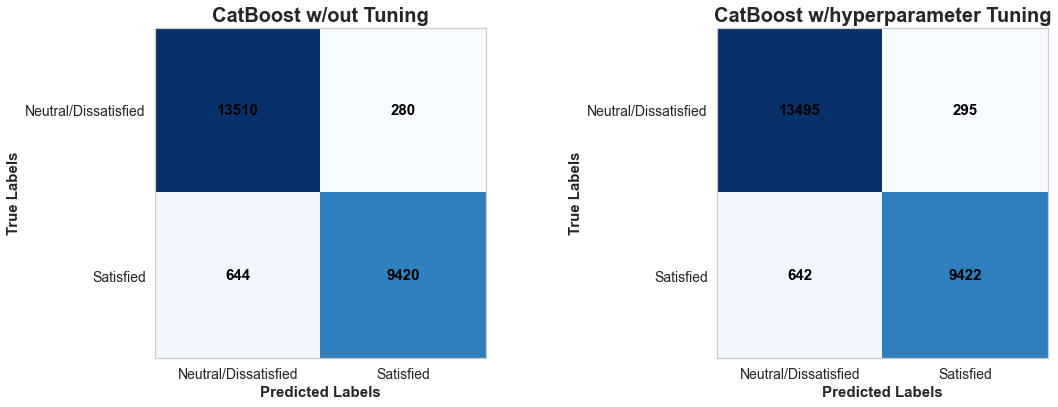

In [93]:
# create a figure with two columns and one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix for CatBoost without tuning
axs[0].imshow(cm_cbv, cmap='Blues') # display the confusion matrix using a blue color map
axs[0].grid(False) # turn off grid lines
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15') # set the x-axis label
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15') # set the y-axis label
axs[0].set_title('CatBoost w/out Tuning', fontweight='bold', fontsize='20') # set the title of the plot
axs[0].set_xticks([0, 1]) # set the positions of the x-ticks
axs[0].set_yticks([0, 1]) # set the positions of the y-ticks
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set the labels of the x-ticks
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set the labels of the y-ticks
axs[0].xaxis.set_tick_params(labelsize=14) # set the font size of the x-tick labels
axs[0].yaxis.set_tick_params(labelsize=14) # set the font size of the y-tick labels

# Add count values to the confusion matrix 
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_cbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# plot second confusion matrix for CatBoost with hyperparameter tuning
cm_cbrs = confusion_matrix(y_test, y_pred_cbc_test_best)
axs[1].imshow(cm_cbrs, cmap='Blues') # display the confusion matrix using a blue color map
axs[1].grid(False) # turn off grid lines
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15') # set the x-axis label
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15') # set the y-axis label
axs[1].set_title('CatBoost w/hyperparameter Tuning', fontweight='bold', fontsize='20') # set the title of the plot
axs[1].set_xticks([0, 1]) # set the positions of the x-ticks
axs[1].set_yticks([0, 1]) # set the positions of the y-ticks
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set the labels of the x-ticks
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set the labels of the y-ticks
axs[1].xaxis.set_tick_params(labelsize=14) # set the font size of the x-tick labels
axs[1].yaxis.set_tick_params(labelsize=14) # set the font size of the y-tick labels

# add count values to the boxes of the confusion matrix 
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_cbrs[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.7)

plt.show()

#### Confusion Matrix Results:
- Compared to the model without tuning, the model with random search performed slightly better in terms of a higher true negative rate, and a lower false positive rate. 
- Both models performed very well. 

### CatBoost (No Tuning) Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>96%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

### CatBoost With RandomSearchCV Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

### Model 5: XGBoost (No Tuning)
- Like the catboost, I will create two different pipelines:
    - The first pipeline will run XGBoost without any hyperparameter tuning. 
    - The second pipeline will be integrated with RandomSearchCV. 

#### XGBoost Pipeline

In [94]:
# Create the encoding transformer
# This transformer uses OrdinalEncoder for the ordinal columns and OneHotEncoder for the categorical columns
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols), # Ordinal encoding for ordinal features
    ('onehot_encoder', OneHotEncoder(), categorical_cols) # One-hot encoding for categorical features
], remainder='passthrough')

#Define the pipeline
# This pipeline includes the encoder, scaler and the XGBoost Classifier
xgb_pipeline = Pipeline([
    ('encoder', encoder), # Encoding transformer
    ('scaler', MinMaxScaler()), # Min-max scaling for all features
    ('clf', xgb.XGBClassifier(random_state=42))# xgboost Classifier without verbose output
])

# Fit the pipeline to the training data 
xgb_pipeline.fit(X_train, y_train)

# Get feature importance
feat_importance = xgb_pipeline.named_steps['clf'].feature_importances_

# Get the 'encoder' step from the XGBoost pipeline
encoder = xgb_pipeline.named_steps['encoder']
# Get the one-hot encoded feature names for the categorical columns
onehot_cols = encoder.named_transformers_['onehot_encoder'].get_feature_names(categorical_cols)
# Combine the one-hot encoded column names with the original ordinal column names
encoded_cols = list(onehot_cols) + ordinal_cols  
# Combine the encoded column names with the numerical column names to get a complete list of all column names
all_cols = encoded_cols + numerical_cols
# Create a dictionary mapping each feature name to its corresponding importance value
feature_importances = dict(zip(all_cols, feat_importance))
# Sort the feature importances dictionary by importance values in descending order
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)


# Make predictions on the training and test data
y_pred_xgb_train = xgb_pipeline.predict(X_train)
y_pred_xgb_test = xgb_pipeline.predict(X_test)

# Print classification report for training data
# This report shows precision, recall, f1-score and support for each class
print('Classification Report: **XGBoost w/out Tuning On Training Data**')
print(classification_report(y_train, y_pred_xgb_train, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for training data
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_pred_xgb_train))

# Check the AUC of predictions for training data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_xgb_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('==================================================================')

# Print classification report for test data
# This report shows precision, recall, f1-score and support for each class
print('\nClassification Report: **XGBoost w/out Tuning On Test Data**')
print(classification_report(y_test, y_pred_xgb_test, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for test data
print('\nConfusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_pred_xgb_test))

# Check the AUC of predictions for the test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_xgb_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)

Classification Report: **XGBoost w/out Tuning On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.99      0.98     40987
              satisfied       0.98      0.95      0.97     30574

               accuracy                           0.97     71561
              macro avg       0.98      0.97      0.97     71561
           weighted avg       0.97      0.97      0.97     71561

Confusion Matrix - Training Data:
[[40536   451]
 [ 1426 29148]]
AUC: 0.9711777871726218



Classification Report: **XGBoost w/out Tuning On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96      0.96     238

#### Results on Training Data:
- On the training data, the classifier achieved an accuracy of 97%, with a precision of 0.97 for the 'neutral or dissatisfied' class and a precision of 0.98 for the 'satisfied' class. The recall for the 'neutral or dissatisfied' class was 0.99, while the recall for the 'satisfied' class was 0.95. The f1-score was 0.98 for the 'neutral or dissatisfied' class and 0.97 for the 'satisfied' class. The AUC was 0.97.

 

#### Results On Test Data:
- XGBoost is high performing model even without any tuning. The XGBoost classifier achieved an accuracy of 96%, with a precision of 0.96 for the 'neutral or dissatisfied' class and a precision of 0.97 for the 'satisfied' class. The recall for the 'neutral or dissatisfied' class was 0.98, while the recall for the 'satisfied' class was 0.94. The f1-score was 0.97 for the 'neutral or dissatisfied' class and 0.95 for the 'satisfied' class. The AUC was 0.96.

- Overall, the XGBoost classifier performed well on both the training and test data, achieving high accuracy and AUC scores with good precision and recall values.

#### Confusion Matrix On Test Data

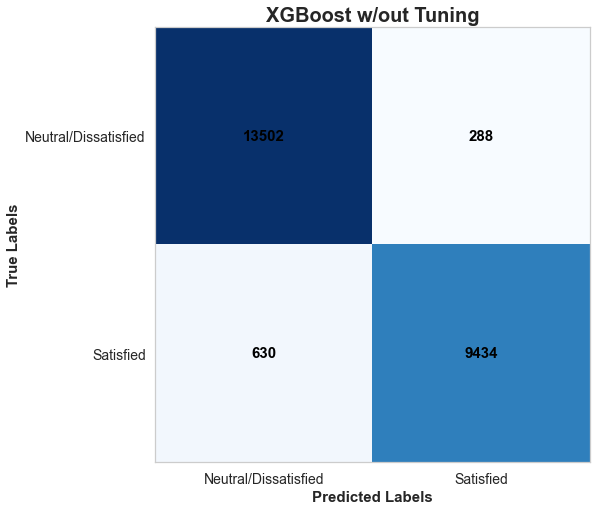

In [95]:
# get confusion matrix
cm_xgbv = confusion_matrix(y_test, y_pred_xgb_test)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_xgbv, cmap='Blues') # Make the color theme blue 
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15') # set x label 
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15') # set y label 
ax.set_title('XGBoost w/out Tuning', fontweight='bold', fontsize='20') # Set title 
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # xaxis labels
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # yaxis labels
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Create a text box inside the confusion matrix 
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_xgbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

#### Confusion matrix observations: 
- The XGBoost model with no tuning did well at reducing the number of missclassifications with 918 out of 23854.

### XGBoost With No Tuning Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>96%</mark> 
- **<mark>AUC Score</mark>**: <mark>96%</mark>

### XGBoost with RandomSearchCV

#### Create New Pipeline With RandomSearch

In [96]:
# Define parameter grid 
# dictionary of hyperparameters to be tuned using a randomized search.
param_grid = {
    'clf__n_estimators': [50, 100, 200, 500, 1000],# Number of trees 
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], # step size shrinkage used to prevent overfitting
    'clf__max_depth': [3, 4, 5, 6, 8, 10], # max depth of the trees
    'clf__min_child_weight': [1, 3, 5, 7], # minimum sum of instance weight needed in child 
}

# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

#Define the pipeline
# This pipeline includes the encoder, scaler, and xgboost classifier
xgb_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', xgb.XGBClassifier())
])

# Create a randomized search object 
xgb_rs = RandomizedSearchCV(xgb_pipeline, 
                            param_distributions=param_grid, #parameter grid
                            cv=5,  # 5 fold cross validation
                            n_iter=20, # number of parameter settings that are sampled
                            n_jobs=-1, # number of CPUs to use
                            scoring='roc_auc', # Evaluation metric to use
                            verbose=1, # Controls verbosity of the search
                            random_state=42) # Random seed for reproducibility 

# Fit the randomized search to the training data
xgb_rs.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", xgb_rs.best_params_) # display best hyperparameters
print("Best score:", xgb_rs.best_score_) #display the best score

# Fit the pipeline on the training data with the best hyperparameters
xgb_pipeline.set_params(**xgb_rs.best_params_)
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_xgb_train_best = xgb_pipeline.predict(X_train)
y_pred_xgb_test_best = xgb_pipeline.predict(X_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 36.3min finished


Best hyperparameters: {'clf__n_estimators': 1000, 'clf__min_child_weight': 3, 'clf__max_depth': 10, 'clf__learning_rate': 0.01}
Best score: 0.993324951900043


In [97]:
# Display the classification report for training data
# This report shows precision, recall, f1-score and support for each class
print('Classification Report: **XGBoost On Training Data With Best Parameters**')
print(classification_report(y_train, y_pred_xgb_train_best, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for training data
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_pred_xgb_train_best))

# Check the AUC of predictions for training data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_xgb_train_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('==========================================================================')

# Display the classification report for test data
# This report shows precision, recall, f1-score and support for each class
print('\nClassification Report: **XGBoost On Test Data With Best Parameters**')
print(classification_report(y_test, y_pred_xgb_test_best, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for test data
print('\nConfusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_pred_xgb_test_best))

# Check the AUC of predictions for test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_xgb_test_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)

Classification Report: **XGBoost On Training Data With Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.99      0.98     40987
              satisfied       0.99      0.95      0.97     30574

               accuracy                           0.97     71561
              macro avg       0.98      0.97      0.97     71561
           weighted avg       0.97      0.97      0.97     71561

Confusion Matrix - Training Data:
[[40581   406]
 [ 1481 29093]]
AUC: 0.9708272846641711



Classification Report: **XGBoost On Test Data With Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96  

#### Results on Training Data:
- For the training data, the model achieved a precision of 0.96 for the 'neutral or dissatisfied' class and a precision of 0.99 for the 'satisfied' class. The recall values were 0.99 for the 'neutral or dissatisfied' class and 0.95 for the 'satisfied' class. The F1-score values were 0.98 for the 'neutral or dissatisfied' class and 0.97 for the 'satisfied' class.
- The auc score was 97%

#### Results On Test Data:
- For the test data, the model achieved a precision of 0.95 for the 'neutral or dissatisfied' class and a precision of 0.97 for the 'satisfied' class. The recall values were 0.98 for the 'neutral or dissatisfied' class and 0.94 for the 'satisfied' class. The F1-score values were 0.97 for the 'neutral or dissatisfied' class and 0.95 for the 'satisfied' class.
- The auc score was 96%


-  Overall the XGBoost model achieved an accuracy of 97% on the training data and an accuracy of 96% on the test data, which is a good performance.

#### Confusion Matrix On Test Data

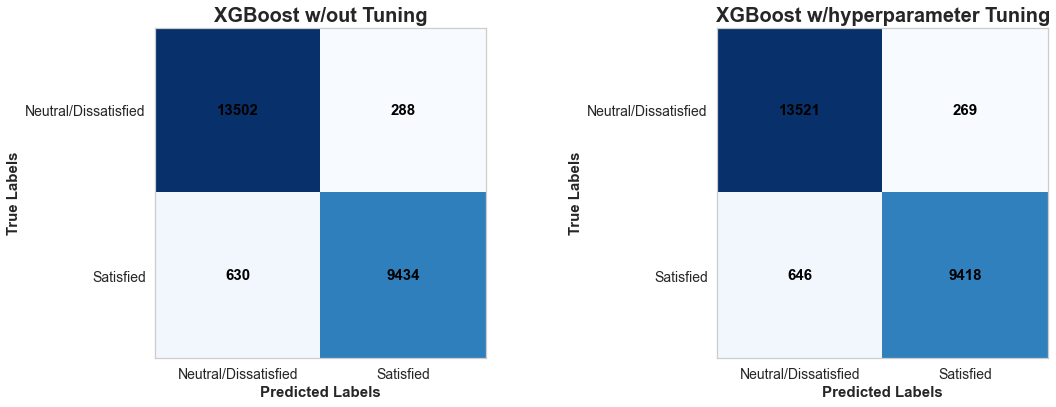

In [102]:
# create a figure with two columns and one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix
axs[0].imshow(cm_xgbv, cmap='Blues') # Blue color scheme
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15') # set xlabel
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15') # set ylabel
axs[0].set_title('XGBoost w/out Tuning', fontweight='bold', fontsize='20') # set title 
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set x axis 
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set y axis
axs[0].xaxis.set_tick_params(labelsize=14)
axs[0].yaxis.set_tick_params(labelsize=14)

# create a text box inside the first confusion matrix 
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_xgbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# plot second confusion matrix
cm_xgbrs = confusion_matrix(y_test, y_pred_xgb_test_best)
axs[1].imshow(cm_xgbrs, cmap='Blues') # set blue color scheme
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15') # set xlabel
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15') # set ylabel
axs[1].set_title('XGBoost w/hyperparameter Tuning', fontweight='bold', fontsize='20') # set title 
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set x axis label
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))# set y axis label
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].yaxis.set_tick_params(labelsize=14)

# set text boxes inside the second confusion matrix 
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_xgbrs[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.7)

plt.show()

#### Confusion Matrix Results:
-  Looking at the two confusion matrices, we can see that the XGBoost model with random search has 646 false negatives (i.e., 646 satisfied customers were incorrectly classified as dissatisfied) and 269 false positives (i.e., 269 dissatisfied customers were incorrectly classified as satisfied). On the other hand, the XGBoost model without tuning has 630 false negatives and 288 false positives. Therefore, the model with random search has a slightly higher false negative rate but a lower false positive rate compared to the model without tuning.

- Overall, the performance of both models is quite good and they are both capable of accurately predicting customer satisfaction based on the given features.

### XGBoost (No Tuning) Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

### XGBoost With RandomSearchCV Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

### Best Model: 
#### XGBoost without tuning
- Without tuning, XGBoost is already a high performing classifier. The F1 scores for both XGBoost models were the same.    
- Both models performed the best in terms of reducing the number of misclassified passengers. 
    - XGBoost w/out tuning = <mark>918</mark>
    - XGBoost w/tuning = <mark>915</mark>
- Both Models had high ROC AUC scores of <mark>96%</mark>, making this model more capable of ranking positive instances higher than negative instances. 

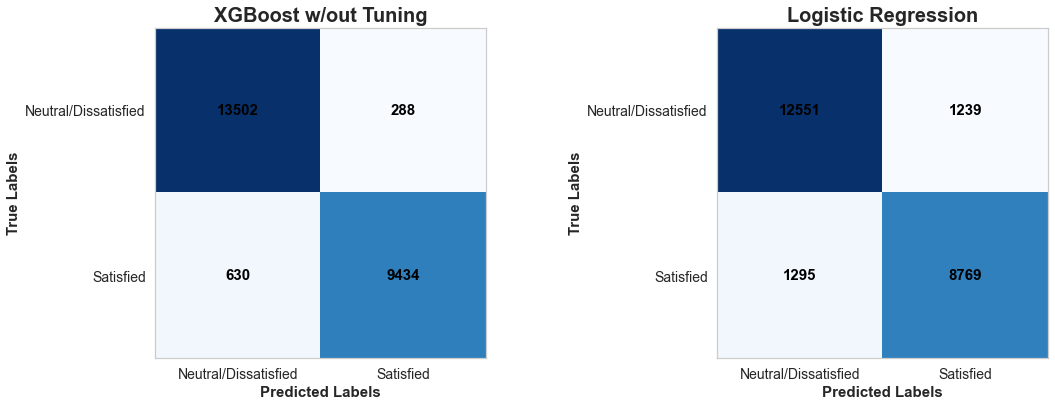

In [103]:
# create a figure with two columns and one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix
axs[0].imshow(cm_xgbv, cmap='Blues') # Blue color scheme
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15') # set xlabel
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15') # set ylabel
axs[0].set_title('XGBoost w/out Tuning', fontweight='bold', fontsize='20') # set title 
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set x axis 
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set y axis
axs[0].xaxis.set_tick_params(labelsize=14)
axs[0].yaxis.set_tick_params(labelsize=14)

# create a text box inside the first confusion matrix 
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_xgbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# plot second confusion matrix
cm_lg = confusion_matrix(y_test, y_test_pred)
axs[1].imshow(cm_xgbrs, cmap='Blues') # set blue color scheme
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15') # set xlabel
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15') # set ylabel
axs[1].set_title('Logistic Regression', fontweight='bold', fontsize='20') # set title 
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied')) # set x axis label
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))# set y axis label
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].yaxis.set_tick_params(labelsize=14)

# set text boxes inside the second confusion matrix 
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_lg[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')


# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.7)

plt.savefig('images/confusion_compare.png', format='png')

plt.show()

#### Best Model and Baseline Model Comparison
- In comparing the two classification reports, it's clear that the XGBoost model outperforms the baseline Logistic Regression model in terms of accuracy, precision, recall, and F1-score for both training and test data.

- For the training data, the Logistic Regression model has an accuracy of 0.90, while the XGBoost model has an accuracy of 0.97. Similarly, for the test data, the Logistic Regression model has an accuracy of 0.89, while the XGBoost model has an accuracy of 0.96.

- The F1-scores for the Logistic Regression model are 0.91 and 0.88 for neutral or dissatisfied and satisfied passengers, respectively, on the test data. In contrast, the XGBoost model has F1-scores of 0.97 and 0.95 for the same classes. This shows that the XGBoost model has better overall performance in terms of balancing precision and recall.

- Additionally, the Area Under the Curve (AUC) scores for the Logistic Regression model are 0.8927 for the training data and 0.8907 for the test data. For the XGBoost model, the AUC scores are 0.9712 for the training data and 0.9583 for the test data. Higher AUC scores for the XGBoost model indicate that it has better classification performance overall.

- In terms of misclassification, the XGBoost model does a significantly better job at reducing the number of misclassfied passengers. 
    - XGBoost = **918**
    - Logistic Regression = **2534**

- In summary, the XGBoost model demonstrates superior performance over the baseline Logistic Regression model across all key evaluation metrics, making it the better choice for predicting airline passenger satisfaction.

### XGBoost Feature Importance:

In [211]:
# Print out features with their corresponding importances
print("Feature importances:")
for feature, importance in sorted_feature_importances:
    print(f'{feature}: {importance}')

Feature importances:
customer_type_Returning Customer: 0.40922918915748596
leg_room: 0.17802201211452484
gender_Female: 0.09302108734846115
inflight_entertainment: 0.06800916790962219
checkin_service: 0.06374547630548477
type_of_travel_Personal Travel: 0.04073949158191681
inflight_wifi_service: 0.021656367927789688
class_Eco Plus: 0.017958687618374825
type_of_travel_Business travel: 0.017868647351861
food_and_drink: 0.016792047768831253
class_Eco: 0.0157735887914896
class_Business: 0.01570146158337593
ease_of_online_booking: 0.015274508856236935
gender_Male: 0.010434379801154137
inflight_service: 0.0037575974129140377
customer_type_First-time Customer: 0.0035373473074287176
flight_distance: 0.0033737767953425646
cleanliness: 0.0026141763664782047
online_boarding: 0.002490935381501913
seat_comfort: 0.0
on-board_service: 0.0
baggage_handling: 0.0


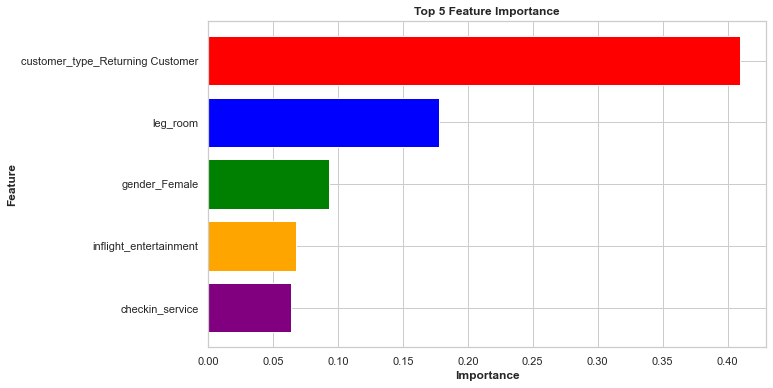

In [210]:
# Get the top 5 features from the sorted_feature_importances list
top_5_features = sorted_feature_importances[:5]

# Unzip the feature names and importance values into separate lists
feature_names, importance_values = zip(*top_5_features)

# Define a list of colors for each bar
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Create a bar chart to visualize the top 5 features with different colors for each bar
fig, ax = plt.subplots(figsize=(10,6))
plt.barh(feature_names, importance_values, color=colors)
ax.set_xlabel('Importance', fontweight='bold')
ax.set_ylabel('Feature', fontweight='bold')
ax.set_title('Top 5 Feature Importance', fontweight='bold')
plt.gca().invert_yaxis()  # Reverse the order of the y-axis to show the most important feature on top

plt.savefig('images/feature_importance.png', format='png')
plt.show()


#### Top Five Important Features Results: 
- **Customer_type_Returning Customer**: The most important feature is whether the passenger is a returning customer. 
    - This suggests that customer loyalty is an important factor in determining customer satisfaction.
    - The company needs to reward their loyalty members with more perks.
        - Possibly increasing the amount of reward miles when a returning customer chooses to travel with Explorer Airlines. 
- **Leg_room**: The second most important feature is whether the passenger had enough leg room during their flight. 
    -  It suggests that customers who had more leg room during their flight were more likely to have a positive experience with the airline. This makes sense as having enough leg room can greatly impact the overall comfort and satisfaction of a customer during a flight.
    - A recommendation for this seems quite clear. Finding ways to increase leg room, even by an inch could increase passenger satisfaction. 
    - Airlines that prioritize leg room can differentiate themselves from competitors and attract more customers who value comfort and quality of service. 
    - Providing adequate leg room can also contribute to customer loyalty and repeat business, as customers are more likely to choose an airline that they know will provide a comfortable travel experience.
- **Gender_Female**: The third most important feature in the model is gender, specifically whether the passenger is female. 
    - This suggests that gender may play a significant role in predicting customer satisfaction in the airline industry.
    - Ensuring there is no favoritism toward one gender or the other is important for customer service. 
    - A recommendation is to begin marketing campaigns geared toward female passengers, to see if airline passenger satisfaction increases. 
- **Inflight_entertainment** - This indicates that customers who had access to entertainment options during their flight were more likely to have a positive experience with the airline. 
    - In-flight entertainment can provide a distraction during long flights and can greatly improve the overall experience of the customer.
    - This can also be a great opportunity where Explorer Airlines can promote their brand, through ads and short commercials. 
    - My recommendation would be to educating passengers on how to use the mobile app for inflight entertainment leading up to the flight. Even if it a couple days before via text or email with a video attached to be helpful. 
    - I recognize the fact that some customers choose not to download the app on their phones. To cater to these passengers, making sure there is a substantial amount of reading material could be helpful as well. 
- **Check-in_service** - This suggests that customers who had a good check-in experience were more likely to have a positive experience with the airline. 
    - Check-in service can be a critical aspect of the travel experience, and a smooth and efficient process can greatly improve customer satisfaction.
    - My recommendation is to meet with the UX team to ensure the online check-in service is as user friendly as possible. 
    - A second recommendation is to staff accordingly during the high traffic hours at the airport, to help with the check-in process run smoothly and as quickly as possible. 

## Conclusion
---
- My goal was to choose the best performing model not only by using evaluation metrics as key indicators but also by selecting the model that excelled at reducing the number of misclassified passengers.
- When Explorer Airlines rolls out its new marketing campaigns targeting dissatisfied customers, the company wants to ensure it reaches as many dissatisfied loyal customers as possible. 
- Given that the most important feature in our analysis was customer_type_returning_customer, it is clear that customer loyalty is a critical factor for Explorer Airlines. 
- By rewarding returning customers with additional perks and prioritizing their comfort and satisfaction, the company can increase customer loyalty and differentiate itself from competitors. This, in turn, could lead to increased revenue and profitability for the company in the long run.

## Future Work
- As with any machine learning project, there is always room for improvement. Given more recent data and additional time for tuning and exploring other models, I am confident that the model's performance could be further improved.

- Once changes or improvements have been made to Explorer Airlines' business model, it would be valuable to re-analyze new survey data to determine if customer satisfaction levels have changed in response to these changes.

- While this analysis provides valuable insights into passenger satisfaction levels for Explorer Airlines, analyzing data from multiple airlines could provide a more comprehensive understanding of the factors that influence customer satisfaction. This would enable companies to identify industry-wide trends and best practices, and adapt their own strategies accordingly.